# **Statistical learning final project**: exploratory data analysis

### Daniel A.
### UID: 100444499

## Importing libraries, data and setting options

In [3]:
# Importing libraries
library(dplyr)
library(ggplot2)
library(stringr)
library(gridExtra)
library(outliers)
library(PerformanceAnalytics)
library(foreach)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following objects are masked from ‘package:dplyr’:

    first, last



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend




In [4]:
# turn off warnings
options(warn=-1)

In [7]:
# importing the data
df <- read.csv('../data/data.csv')

## Helper Functions

In [52]:
# function to plot
plots <- function(dataset, col, fw=FALSE, hist='default',
                  density='default' , bins='default',
                  xtick_angles='default', sep=FALSE, savefig='default', filename='./plot.png') {
    var <- dataset %>% dplyr::select(col)
    if (bins == 'default') {bins <- rep(10,2)}
    if (xtick_angles == 'default') {xtick_angles <- rep(90,2)}
    if (hist == 'default') {hist <- c(FALSE,FALSE)}
    if (density == 'default') {density <- c(TRUE,TRUE)}
    if (savefig == 'default') {savefig <- c(FALSE,14,14)}

    p1 <- dataset %>% ggplot(aes(x=var[,1])) +
        geom_boxplot() +
        ggtitle(str_interp("${col}")) +
        theme(axis.title.x=element_blank(),axis.text.y=element_blank())
    p2 <- dataset %>% ggplot(aes(x=var[,1], fill=hdi_cat)) +
        geom_boxplot() +
        ggtitle(str_interp("${col} grouped by HDI")) +
        theme(axis.title.x=element_blank(),axis.text.y=element_blank())
    p3 <- dataset %>% ggplot(aes(x=var[,1])) +
        ggtitle(str_interp("${col}")) +
        theme(axis.title.x=element_blank(),
                axis.text.x = element_text(angle = xtick_angles[1]))
    p4 <- dataset %>% ggplot(aes(x=var[,1])) +
        ggtitle(str_interp("${col} by HDI group")) +
        theme(axis.title.x=element_blank(),
                axis.text.x = element_text(angle = xtick_angles[2]))
    if (hist[1] == TRUE) {
        p3 <- p3 + geom_histogram(aes(y=..density..),bins=bins[1])}
    if (hist[2] == TRUE) {
        p4 <- p4 + geom_histogram(show.legend = FALSE,bins=bins[2],
                                  aes(fill=hdi_cat,y=..density..))}
    if (density[1] == TRUE) {
        p3 <- p3 + geom_density()}
    if (density[2] == TRUE) {
        p4 <- p4 + geom_density(aes(group=hdi_cat,colour=hdi_cat,fill=hdi_cat))}
    if (fw == TRUE) {p4 <- p4 + facet_wrap(~hdi_cat, nrow = 1)}
    if (sep == TRUE) {
        grid.arrange(p1,p2, nrow=2)
        grid.arrange(p3,p4, nrow=2)}
    else {grid.arrange(p1,p2,p3,p4, nrow=4)}
    if (savefig[1] == TRUE) {ggsave(file=filename, width=savefig[2], height=savefig[3],
                                 arrangeGrob(p1,p2,p3,p4, nrow=4))}
}

In [9]:
# Helper function to colour num. variables by cat. variables
colors <- function(cat_var, colors_vector) {
    kleuren <- as.numeric(as.factor(cat_var))
    foreach (i=1:length(kleuren), kleur=kleuren) %do% {
        kleuren[i] = colors_vector[kleur]
    }
    return(kleuren)
}

## Variables

- **year**: year the data was obtained in
- **year_code**: code for the year as the world bank databank sets it
- **country_name**: name of the country
- **country_code**: alpha-3 ISO 3166 code for the country
- **foreign_inv_inflows**: Foreign direct investment, net inflows (BoP, current US$)
- **exports_perc_gdp**: Exports of goods and services (as a % of GDP)
- **inflation_perc**: Inflation, consumer prices (annual %)
- **education_years**: Compulsory education, duration (years)
- **education_perc_gdp**: Government expenditure on education, total (as a % of GDP)
- **gds_perc_gdp**: Gross domestic savings (as a % of GDP)
- **gross_savings_perc_gdp**: Gross savings (as a % of GDP)
- **int_tourism_arrivals**: International tourism, number of arrivals
- **int_tourism_receipts**: International tourism, receipts (in current US$)
- **perc_internet_users**: Individuals using the Internet (as a % of population)
- **access_to_electricity**: Access to electricity (% of population)
- **agricultural_land**: Agricultural land (% of land area)
- **birth_rate**: Birth rate, crude (per 1,000 people)
- **gne**: Gross national expenditure (% of GDP)
- **mobile_subscriptions**: Mobile cellular subscriptions (per 100 people)
- **infant_mort_rate**: Mortality rate, infant (per 1,000 live births)
- **sex_ratio**: Sex ratio at birth (male births per female births)
- **greenhouse_gas_em**: Total greenhouse gas emissions (kt of CO2 equivalent)
- **urban_pop_perc**: Urban population (% of total population)
- **hdi**: human development index (target variable)
- **hdi_cat**: Human development index as a category (target variable)

### Target Variable: HDI as a category (very high, high, medium, low)

Method of calculation (from wikipedia):

![image]("./img/hdicalc.png")

In [19]:
# setting colnames for variables to use in the analysis
cols = names(df)
cols = cols[6:(length(cols)-2)]

In [20]:
cols

[1] "foreign_inv_inflows"    "exports_perc_gdp"       "inflation_perc"        
 [4] "education_years"        "education_perc_gdp"     "gds_perc_gdp"          
 [7] "gross_savings_perc_gdp" "int_tourism_arrivals"   "int_tourism_receipts"  
[10] "perc_internet_users"    "access_to_electricity"  "agricultural_land"     
[13] "birth_rate"             "gne"                    "mobile_subscriptions"  
[16] "infant_mort_rate"       "sex_ratio"              "greenhouse_gas_em"     
[19] "urban_pop_perc"

In [21]:
# Selecting colours per HDI
color_1 <- "blueviolet"
color_2 <- "red"
color_3 <- "black"
color_4 <- "green"
palette <- c(color_1,color_2,color_3,color_4)
hdi_colours <- colors(df$hdi_cat,palette)

## Plots per variable

In [22]:
# setting plot size
options(repr.plot.width=12, repr.plot.height=14)

### Foreign Investment Inflows

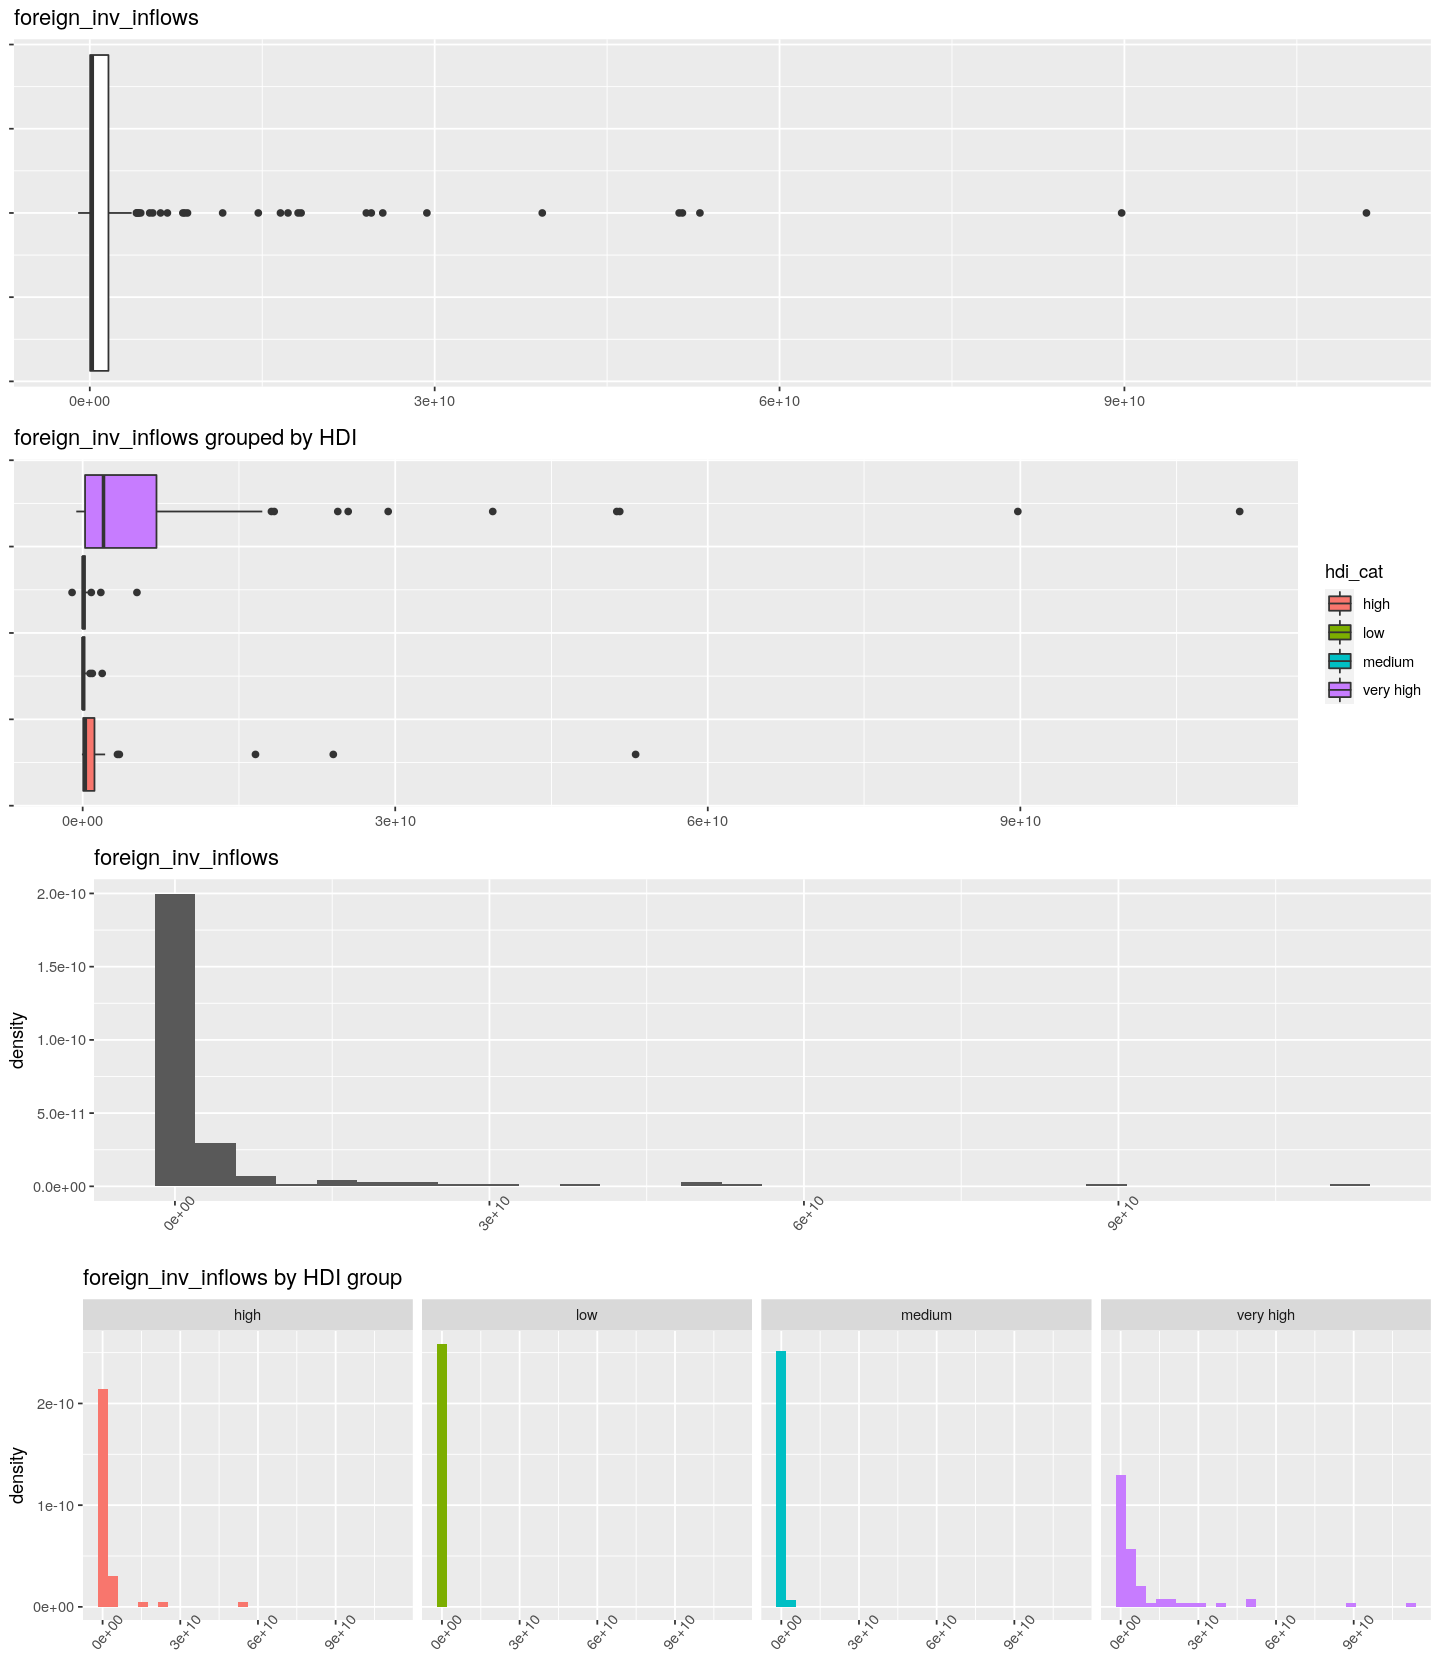

In [65]:
plots(dataset=df, col=cols[1], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), xtick_angles=c(50,50) ,bins=c(30,30), fw=TRUE, sep=FALSE)

In [24]:
df$country_name[df$foreign_inv_inflows > 10014783649.551354]

[1] "Australia"      "Belgium"        "Brazil"         "Canada"        
 [5] "China"          "France"         "Germany"        "Ireland"       
 [9] "Italy"          "Japan"          "Mexico"         "Netherlands"   
[13] "Spain"          "Sweden"         "United Kingdom" "United States"

There's several extreme outliers for GDP, not only in general but also per group and most values concentrate around a specific range. The highest gdp countries

In [25]:
quantile(df$gdp)

0%  25%  50%  75% 100% 
  NA   NA   NA   NA   NA

Our main, general outliers are the following:

In [26]:
df$country_name[df$gdp>1000000000000]

character(0)

### Exports as a percentage of GDP

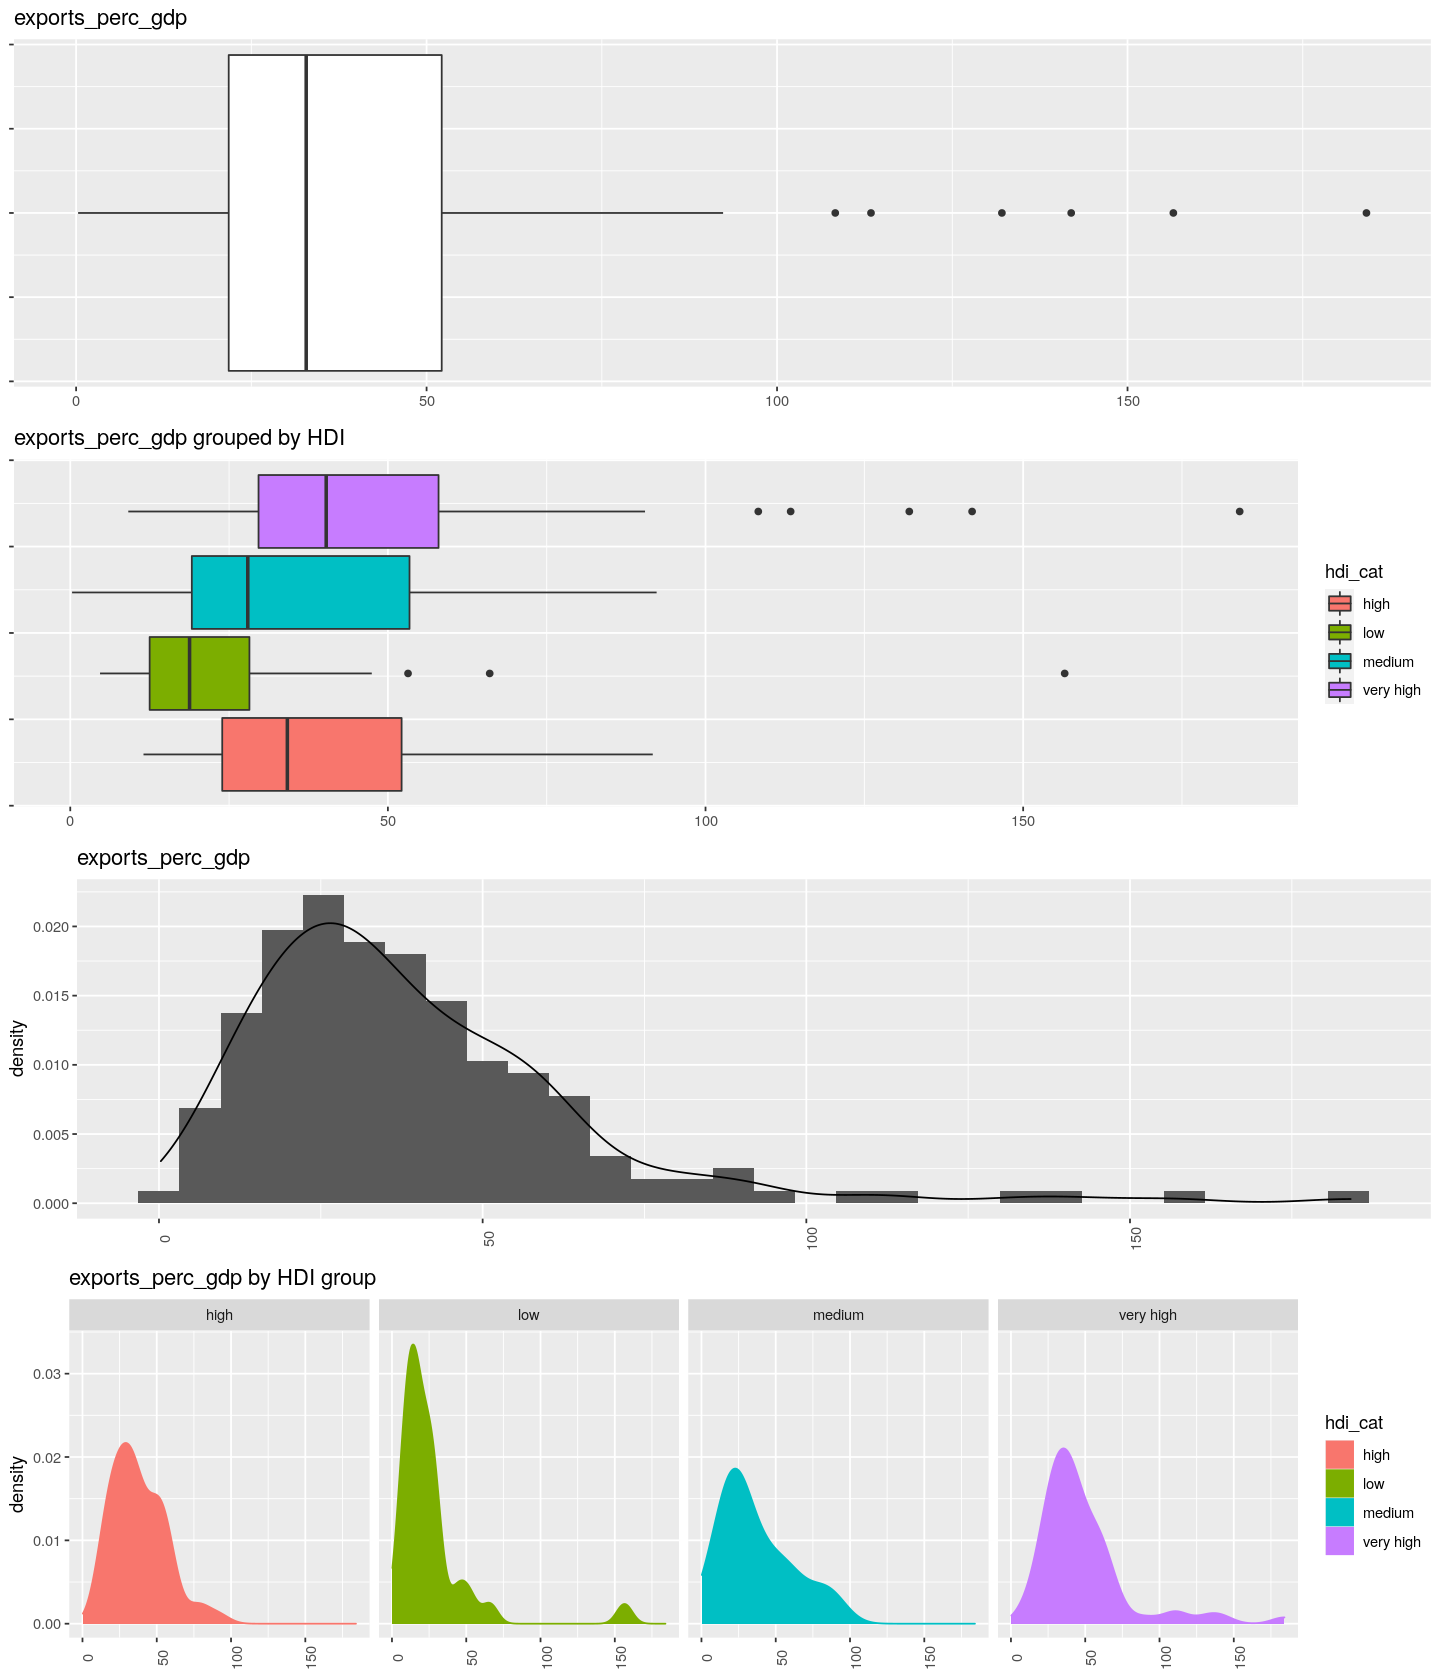

In [66]:
plots(dataset=df, col=cols[2], hist=c(TRUE,FALSE), density=c(TRUE,TRUE), bins=c(30,30), fw=TRUE, sep=FALSE)

### Inflation

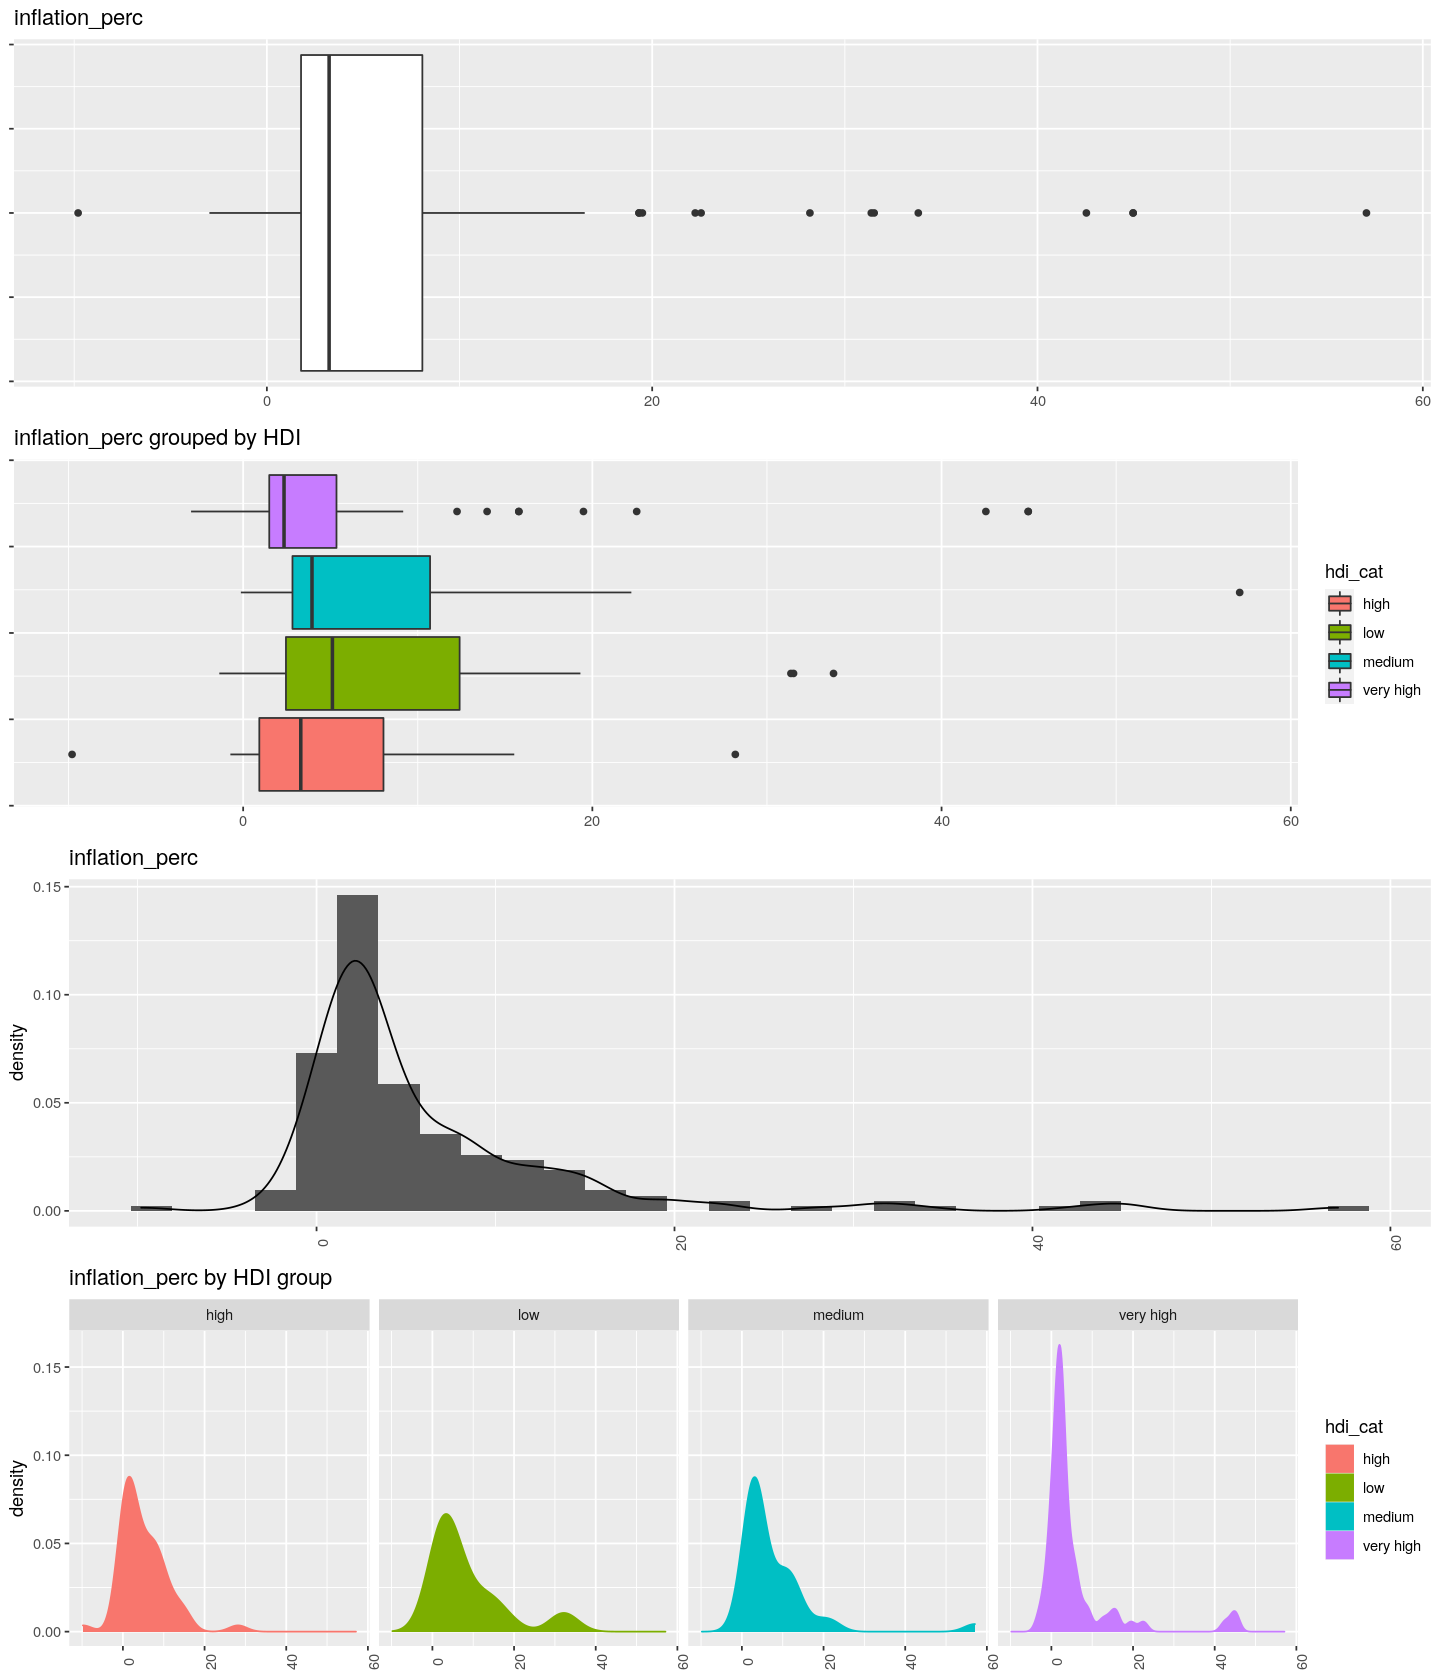

In [47]:
plots(dataset=df, col=cols[3], hist=c(TRUE,FALSE), density=c(TRUE,TRUE), bins=c(30,30), fw=TRUE, sep=FALSE)

### Years of compulsory education

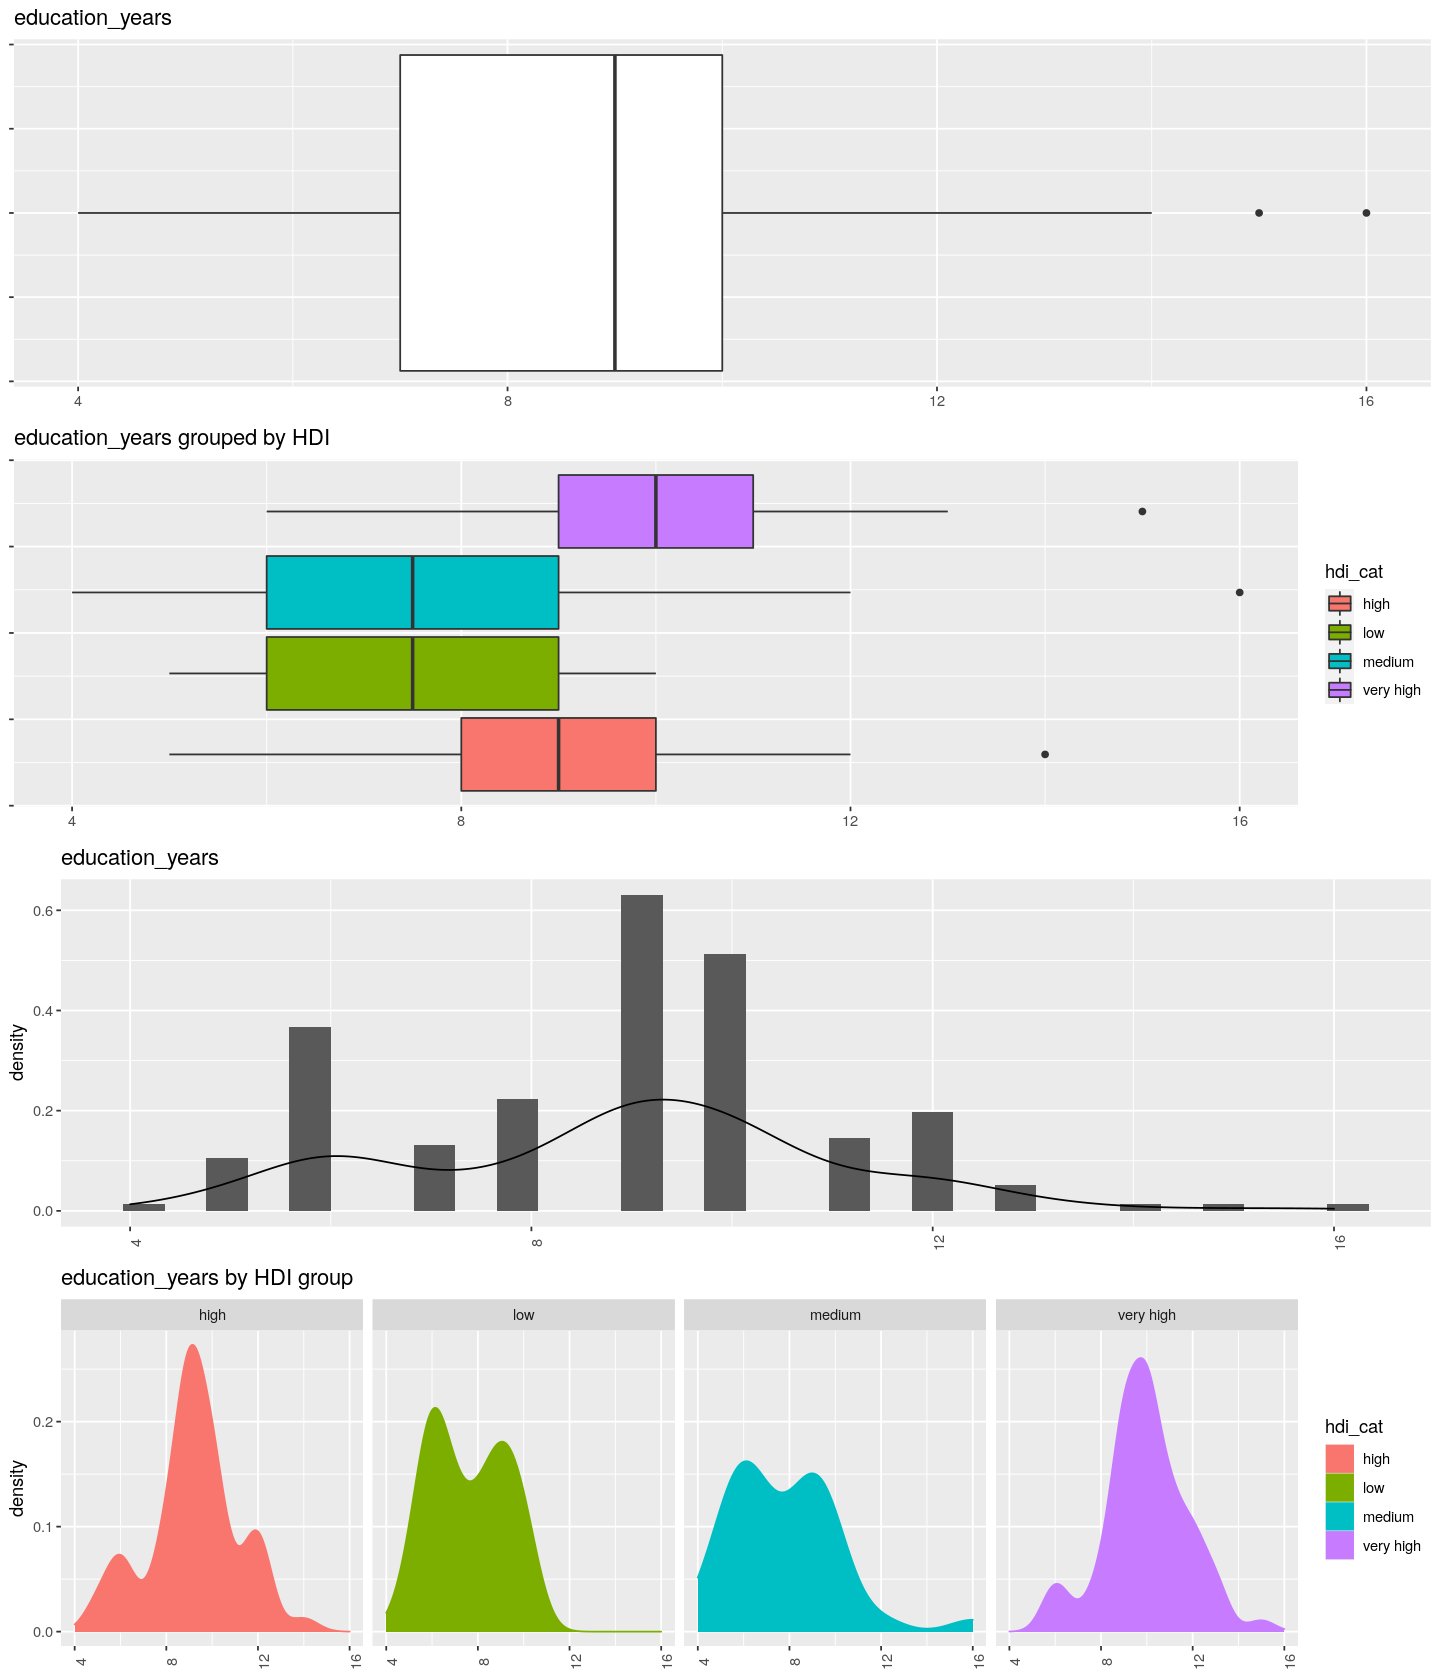

In [67]:
plots(dataset=df, col=cols[4], hist=c(TRUE,FALSE), density=c(TRUE,TRUE), bins=c(30,30), fw=TRUE, sep=FALSE, savefig=c(TRUE,12,12), filename='education_years.png')

### Education budget as a percentage of GDP

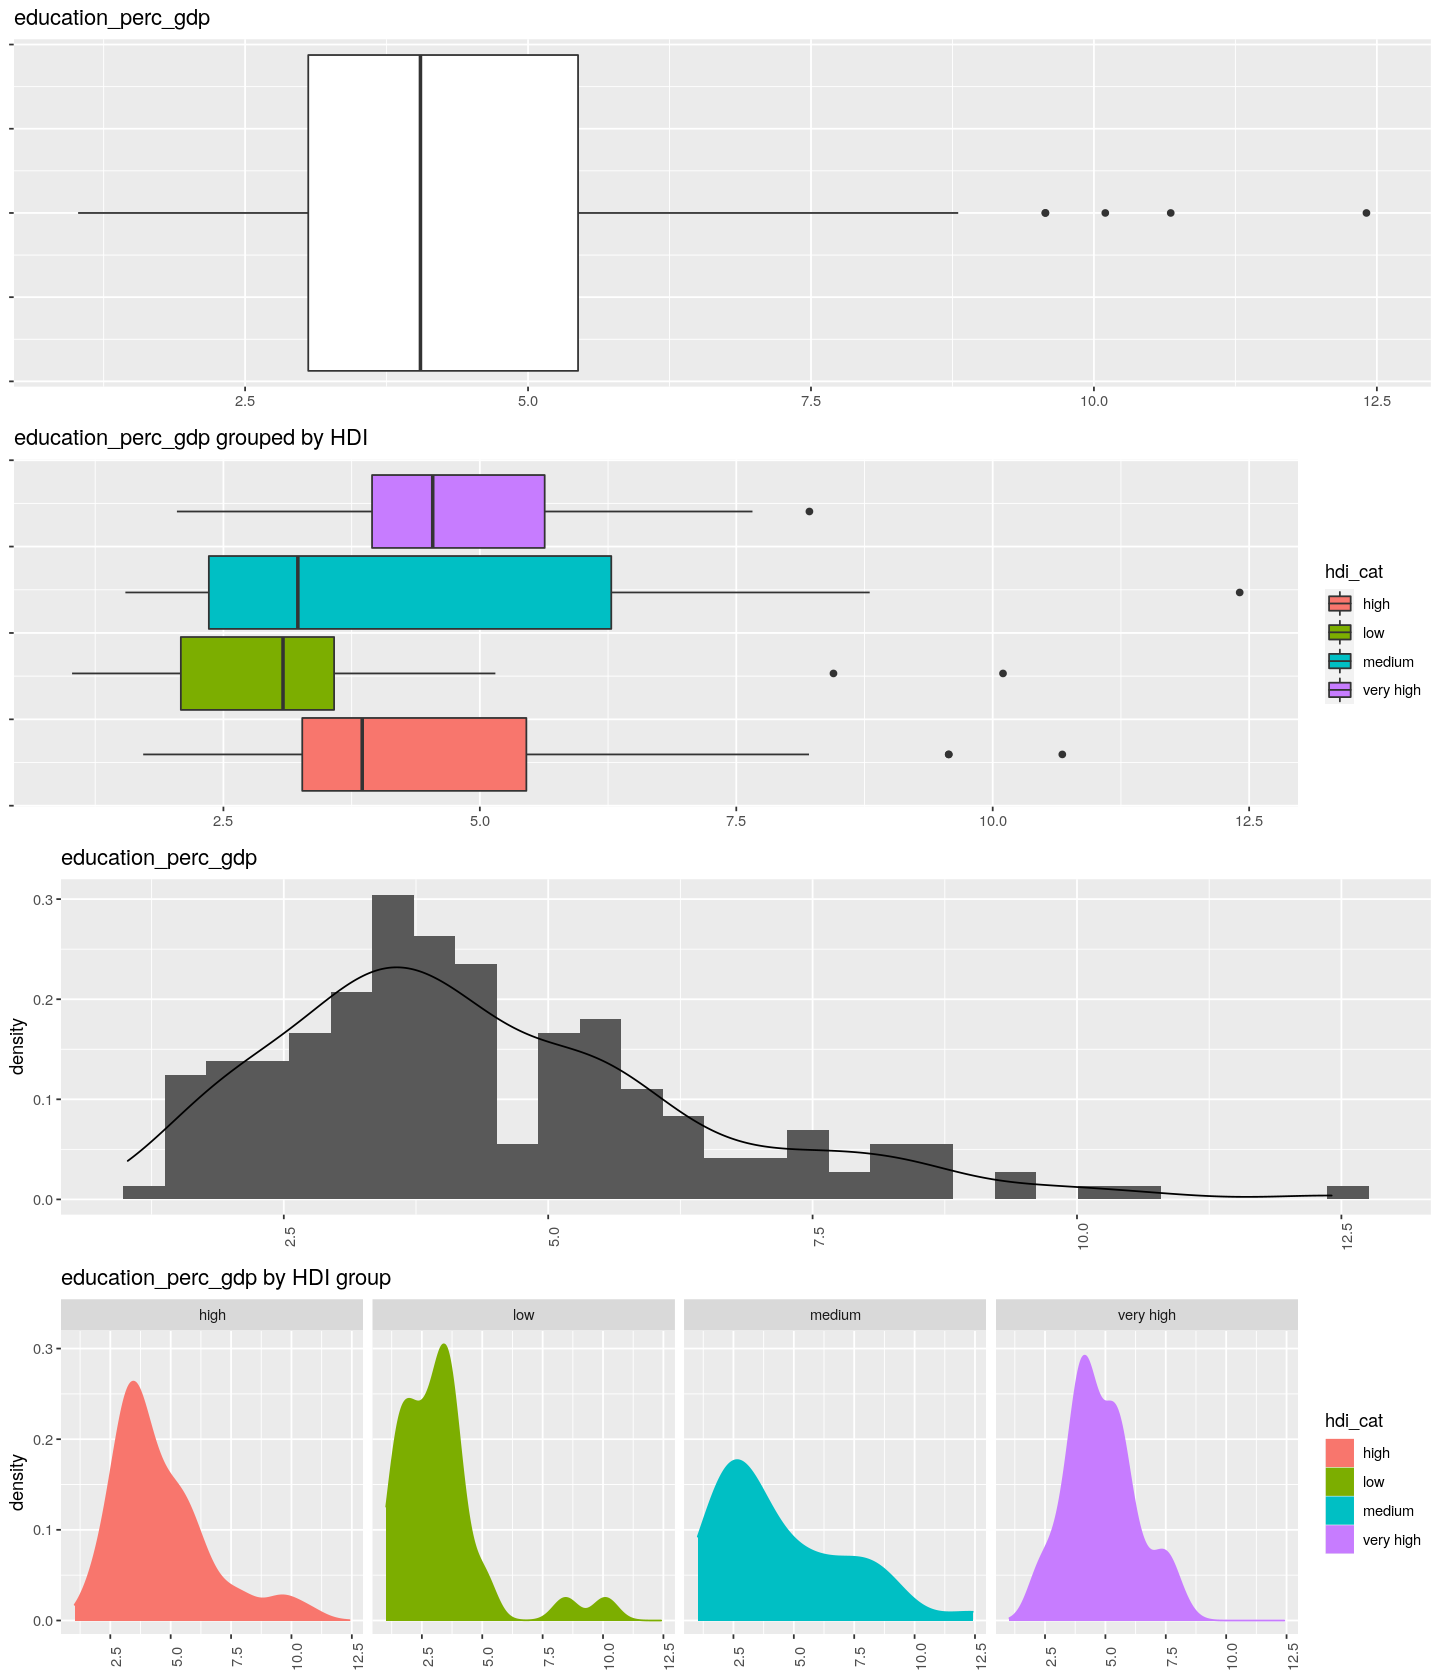

In [30]:
plots(dataset=df, col=cols[5], hist=c(TRUE,FALSE), density=c(TRUE,TRUE), bins=c(30,30), fw=TRUE, sep=FALSE)

### Gross domestic savings as a percentage of GDP

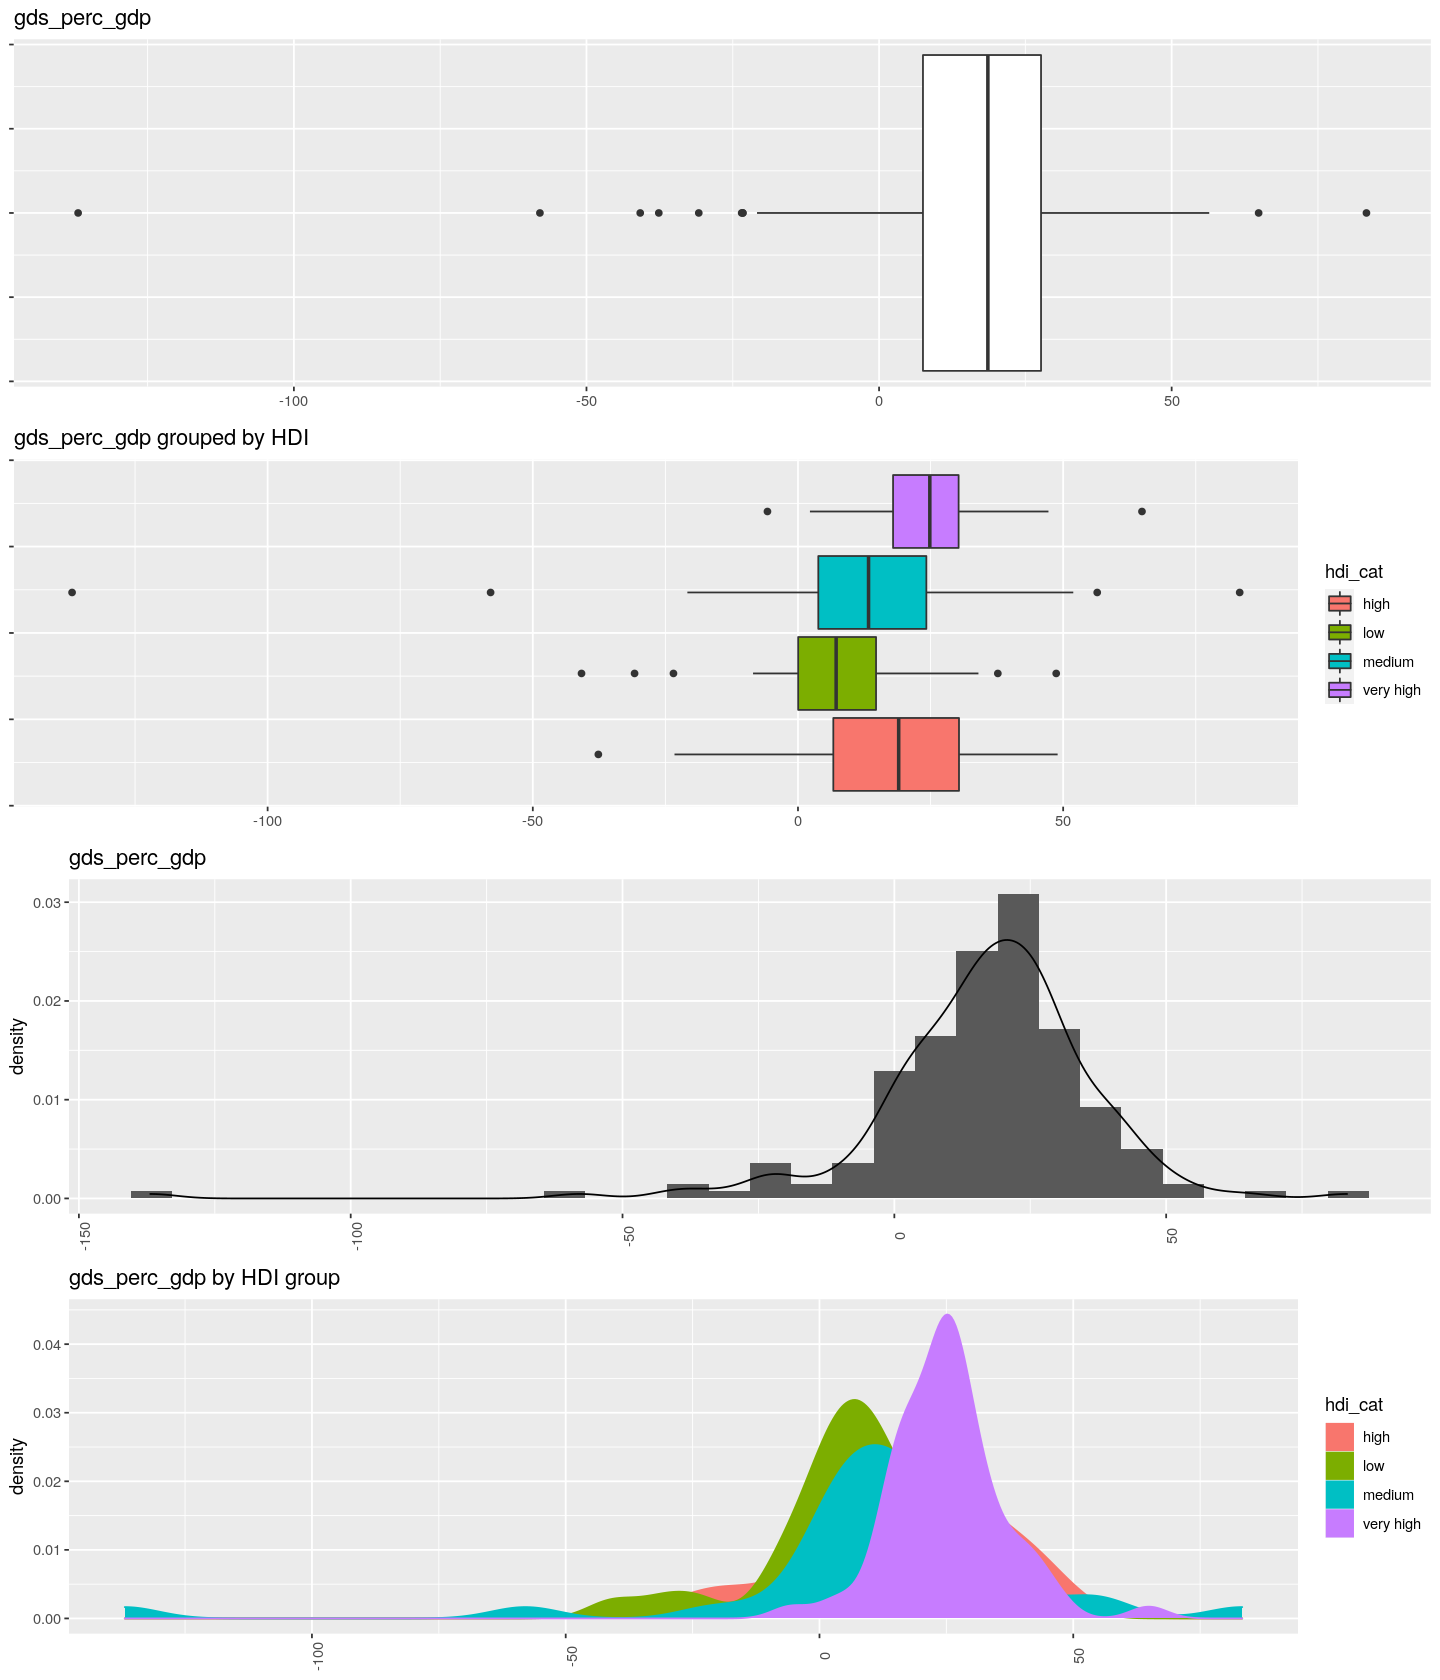

In [31]:
plots(dataset=df, col=cols[6], hist=c(TRUE,FALSE), density=c(TRUE,TRUE), bins=c(30,30), fw=FALSE, sep=FALSE)

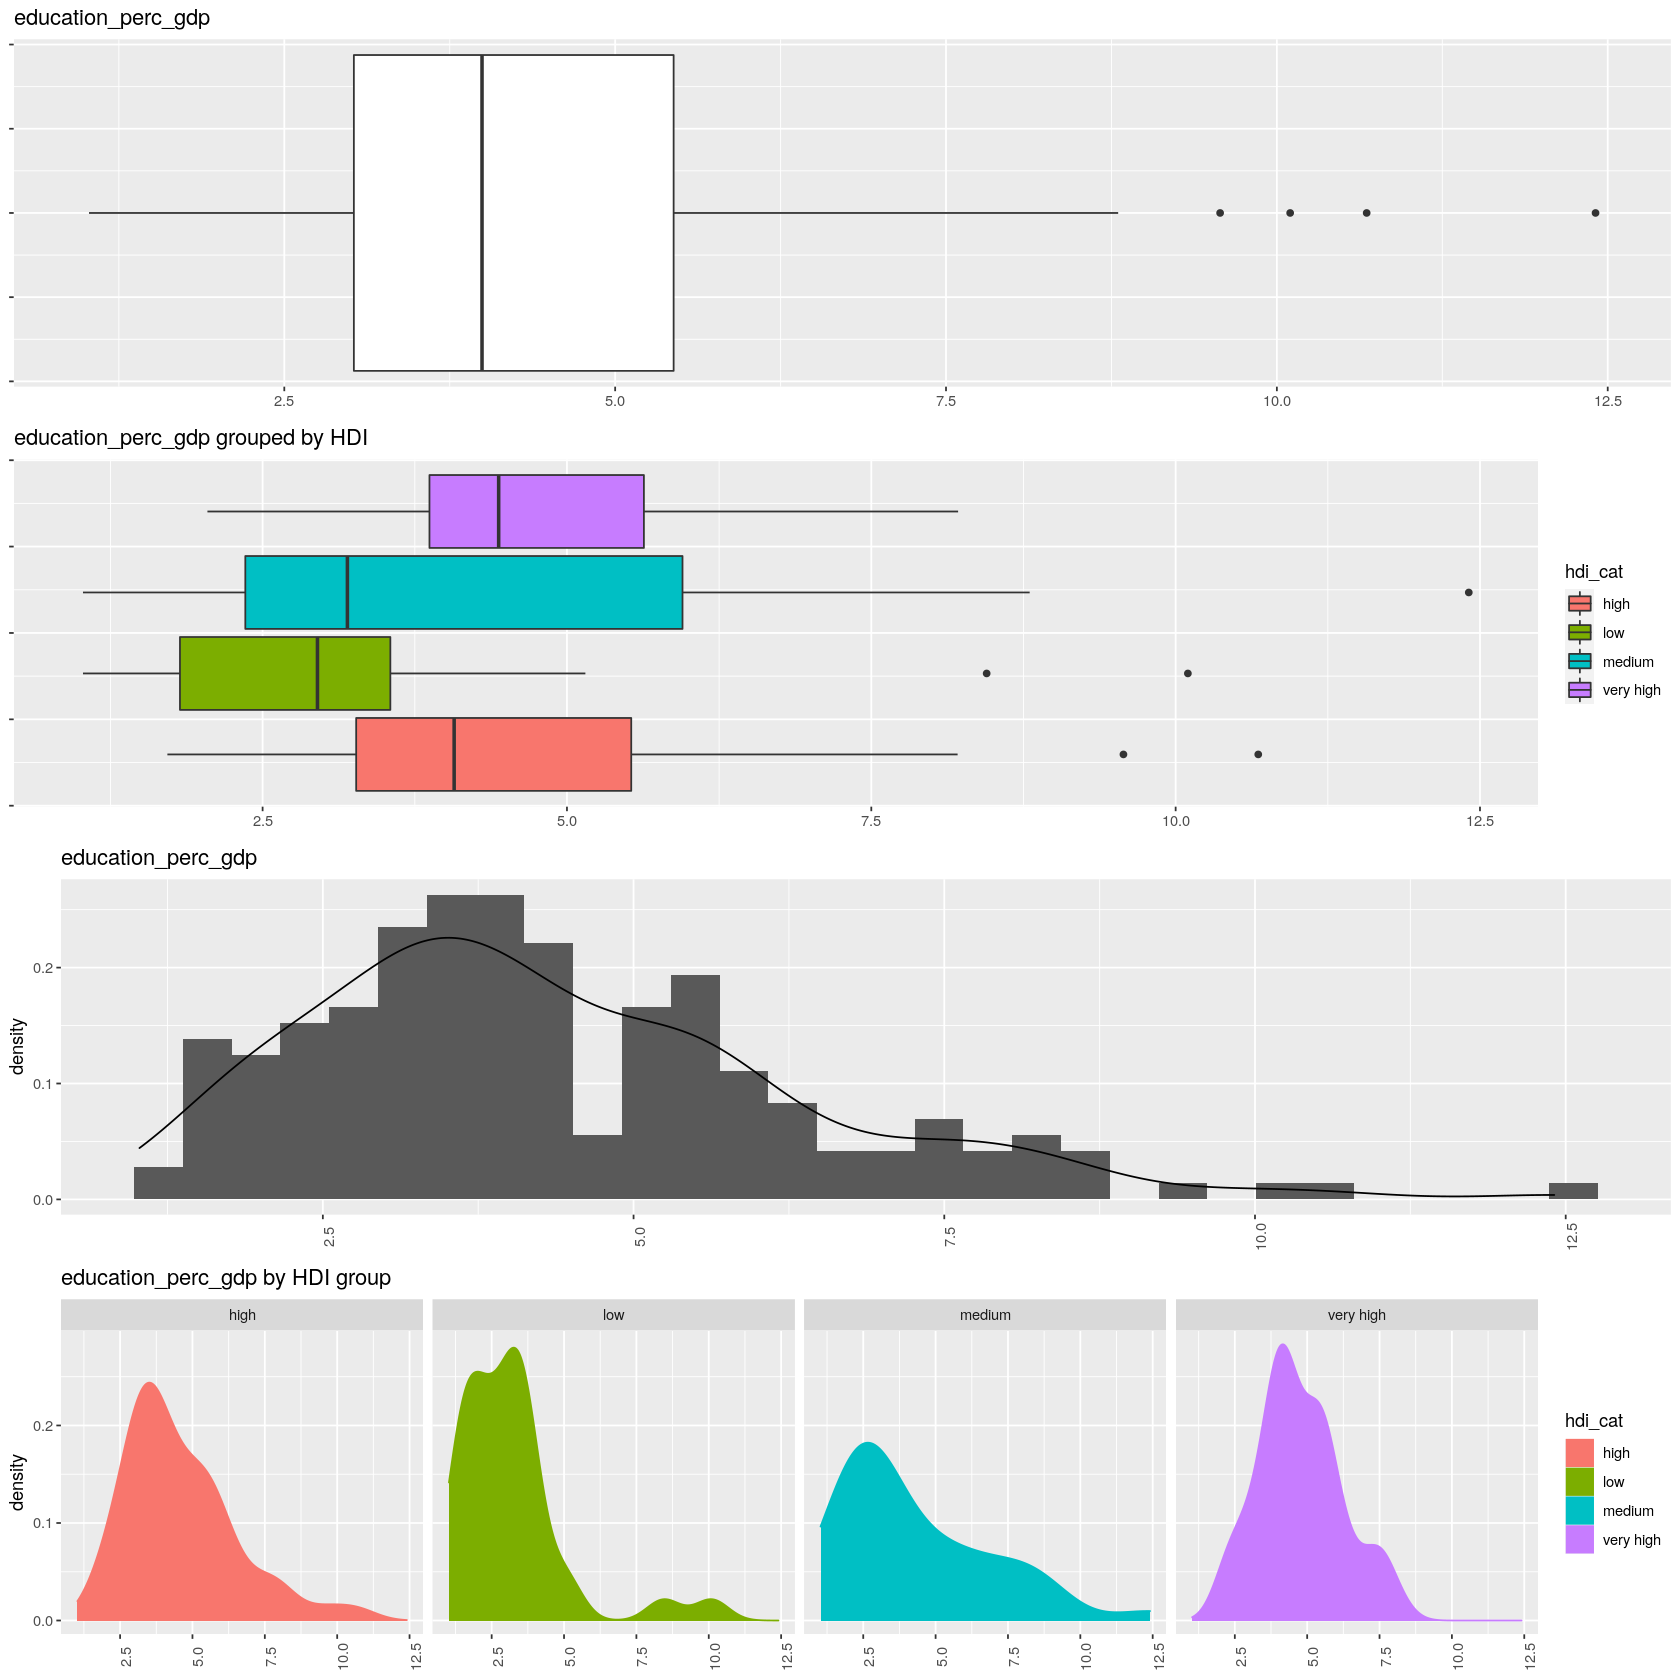

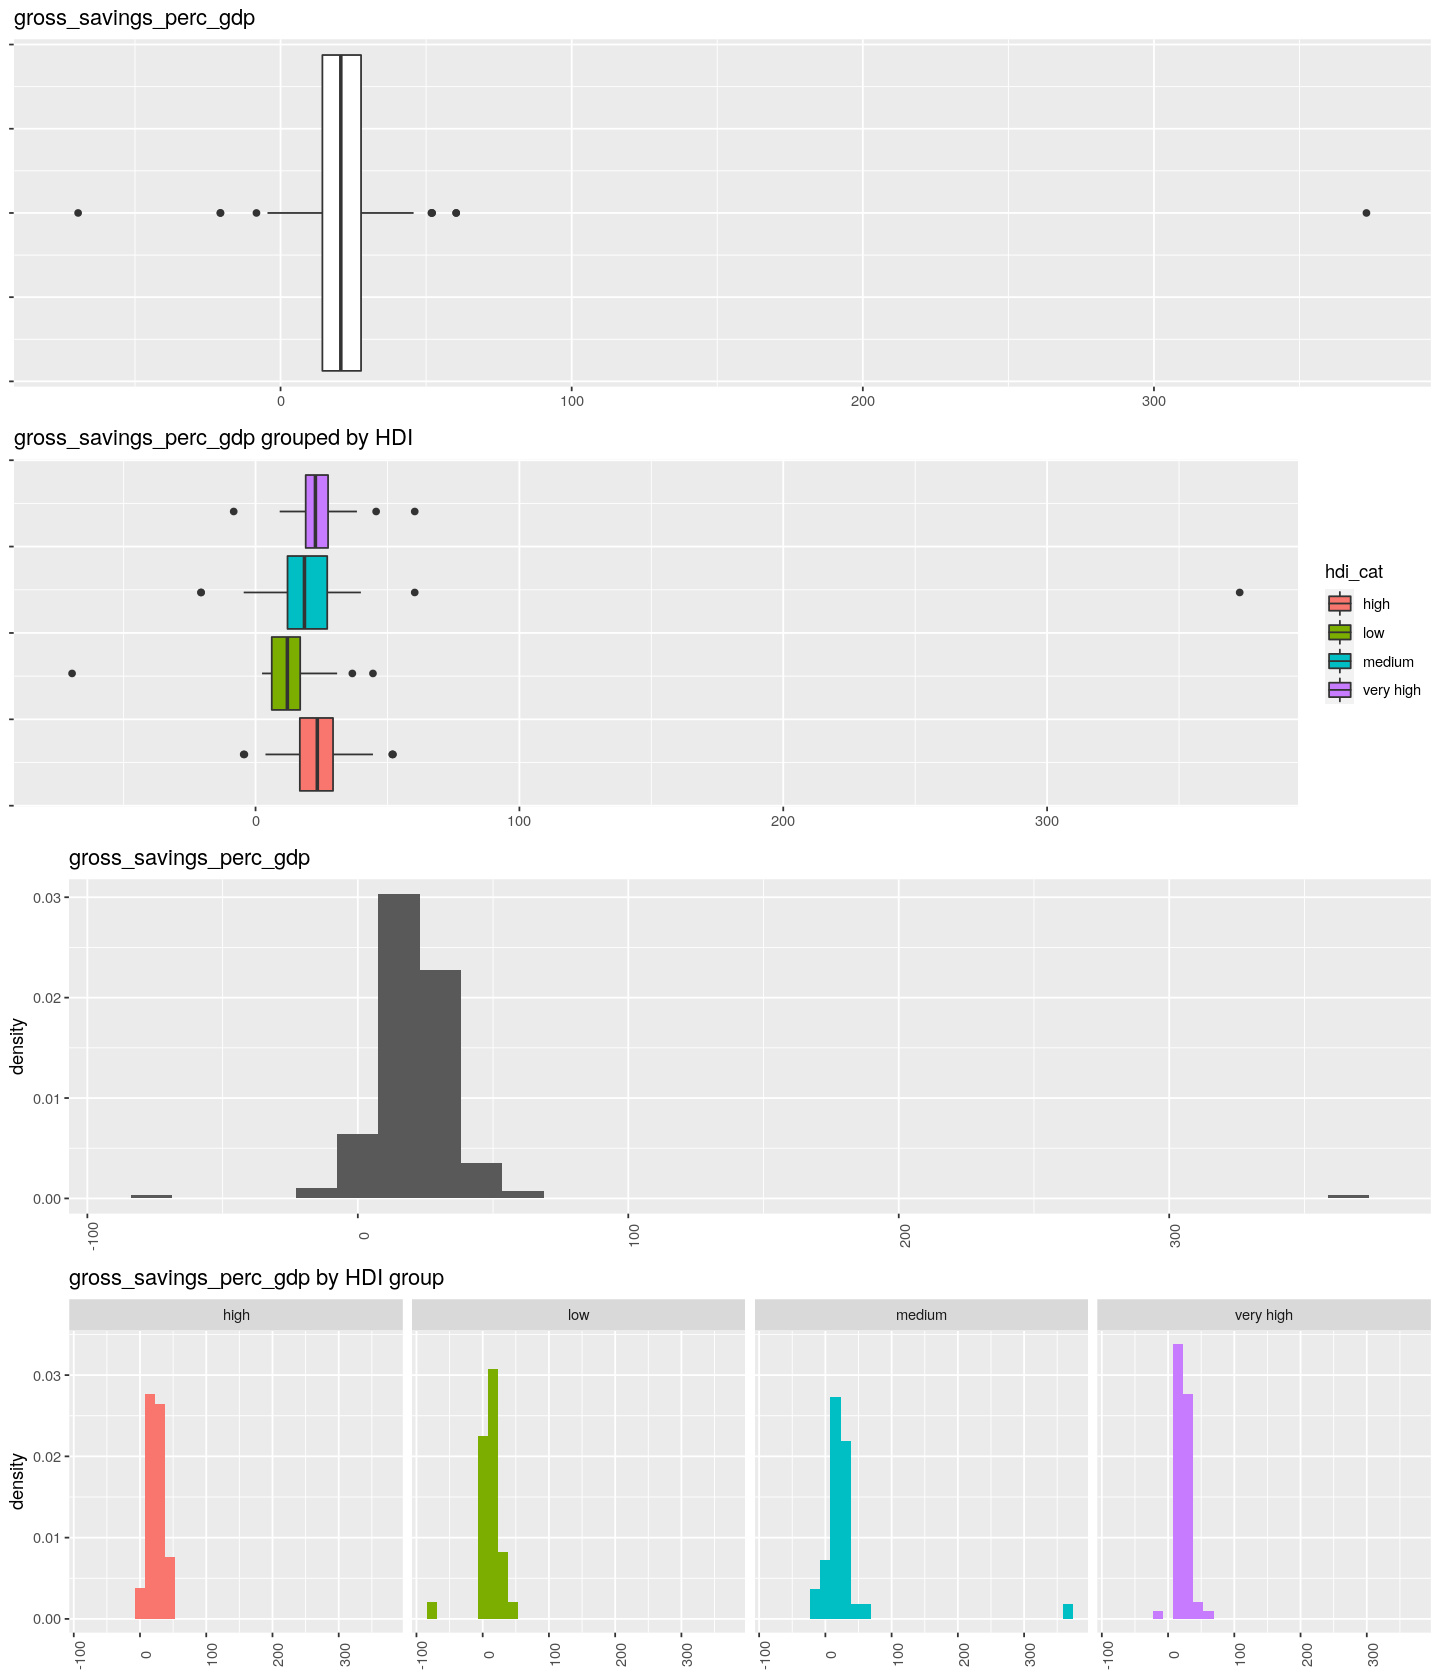

In [32]:
plots(dataset=df, col=cols[7], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), bins=c(30,30), fw=TRUE, sep=FALSE)

### International tourism arrivals

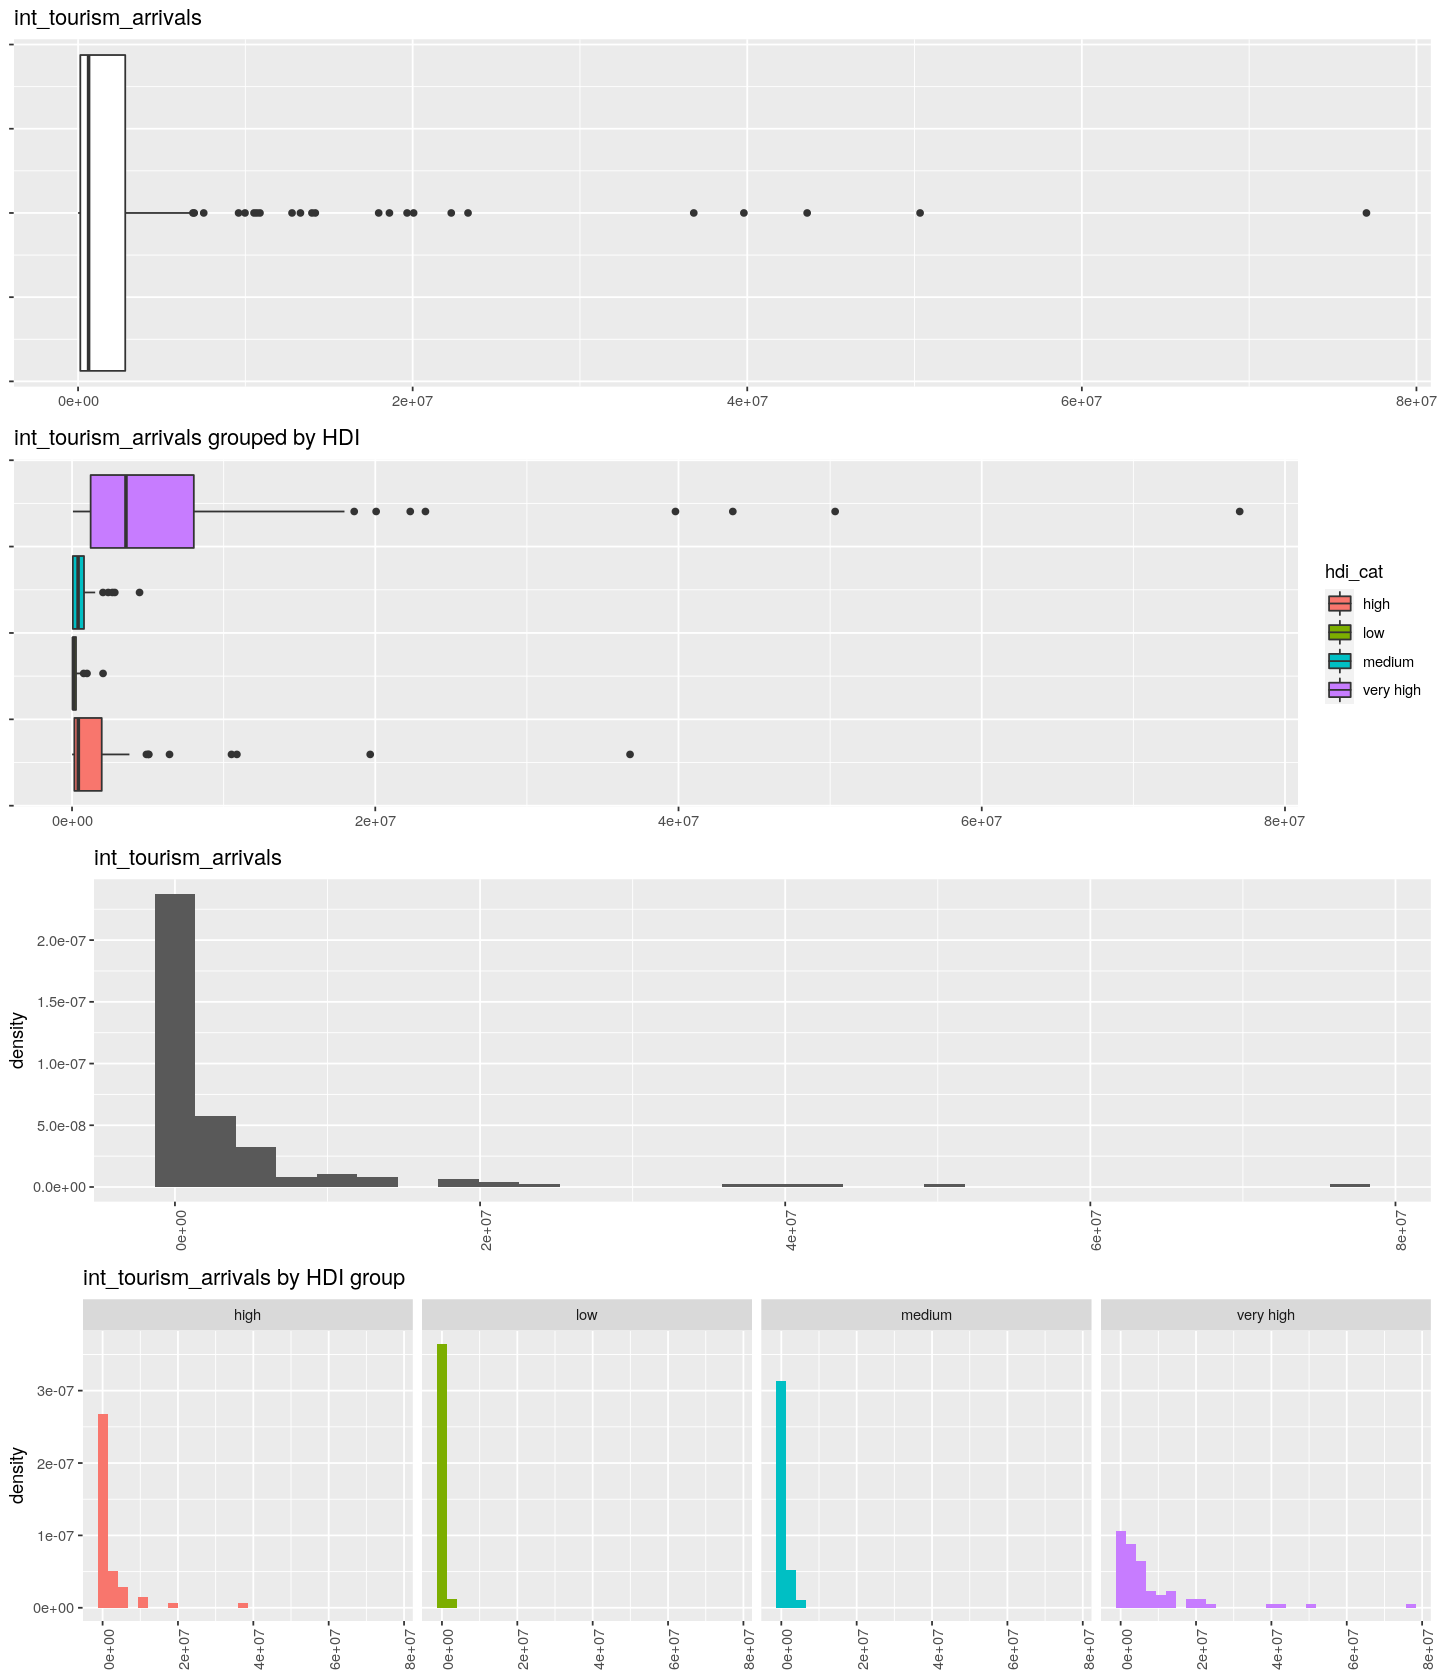

In [46]:
plots(dataset=df, col=cols[8], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), bins=c(30,30), fw=TRUE, sep=FALSE)

### International tourism receipts

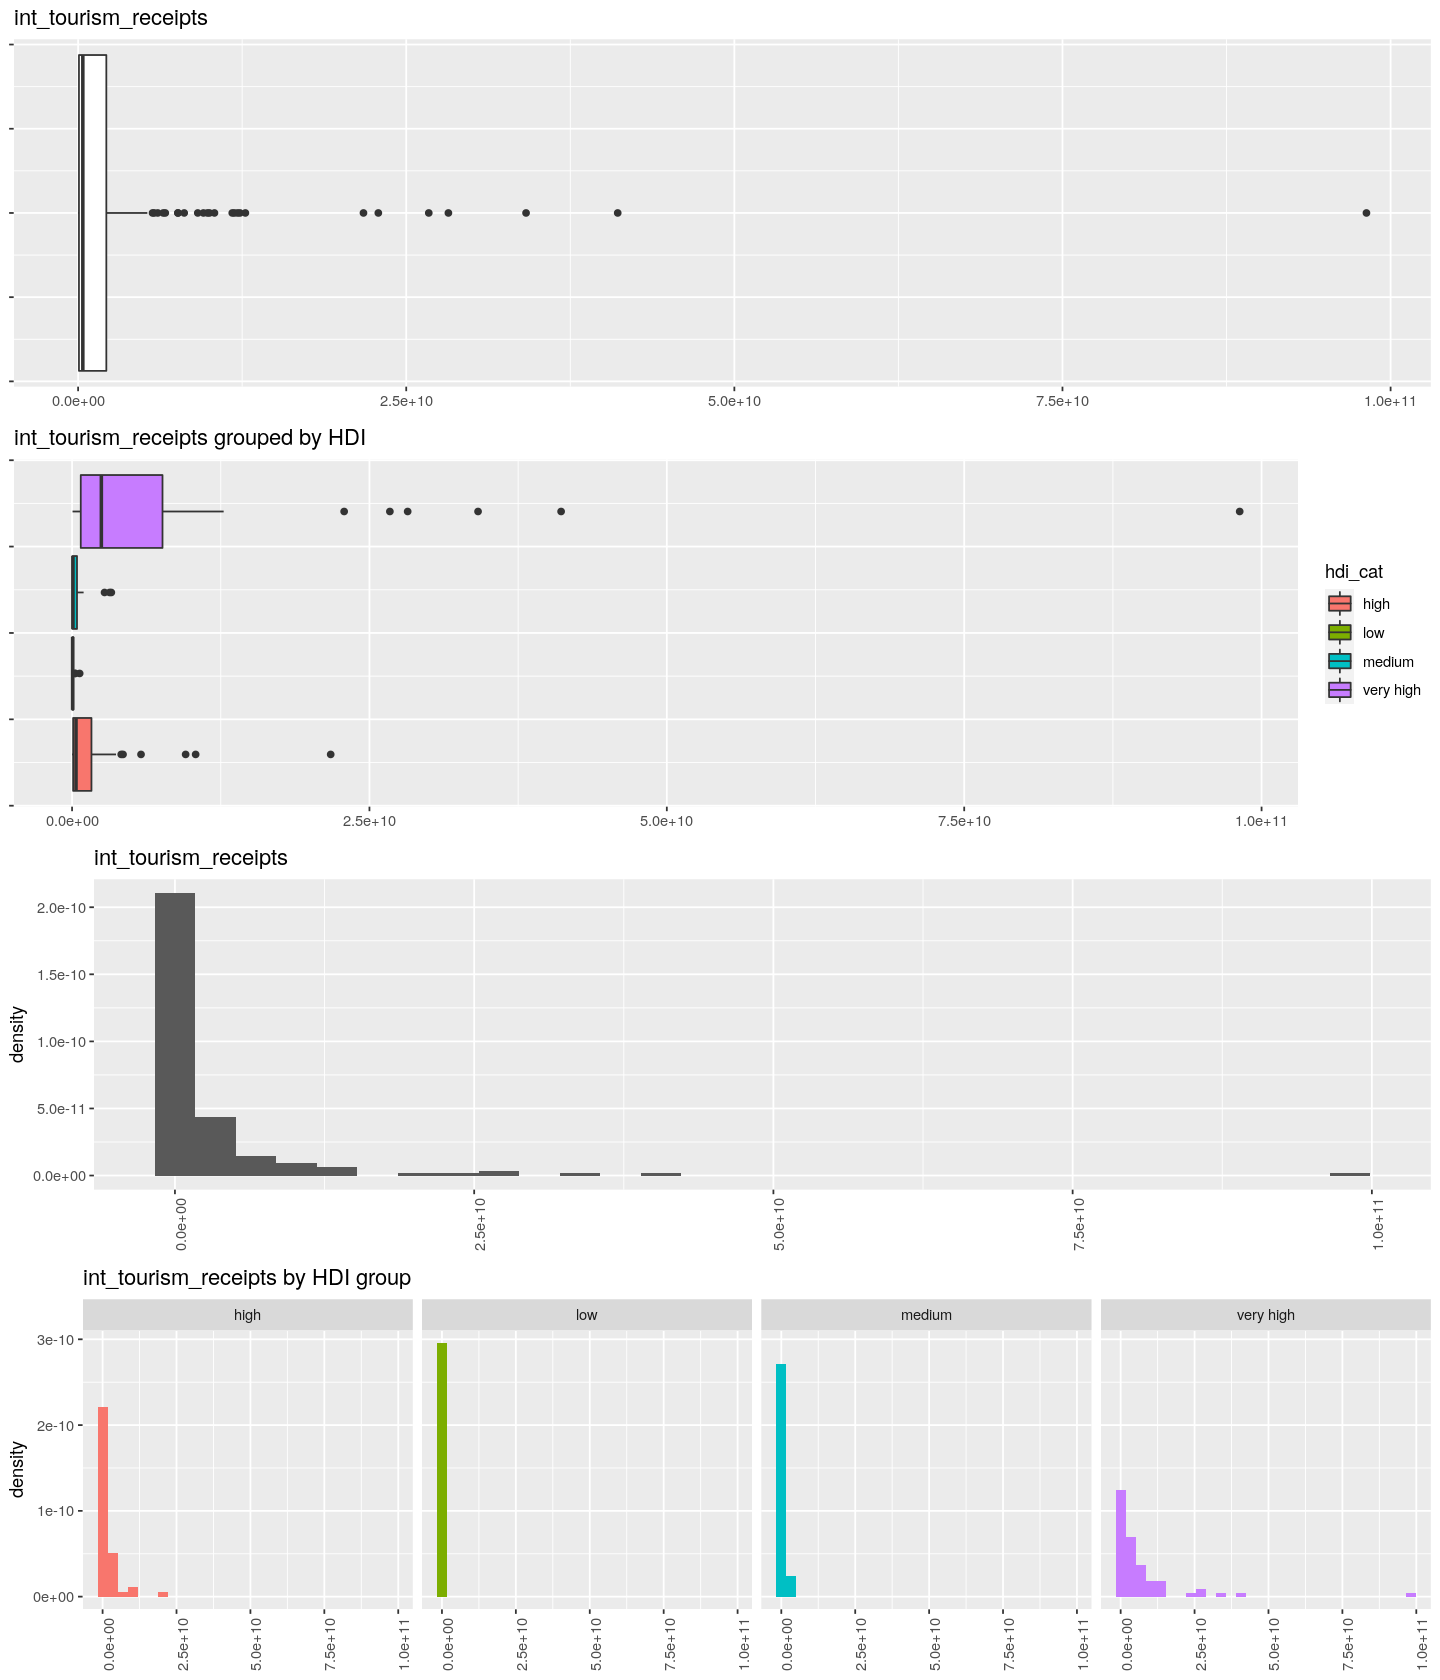

In [34]:
plots(dataset=df, col=cols[9], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), bins=c(30,30), fw=TRUE, sep=FALSE)

### Percentage of the population which use the internet

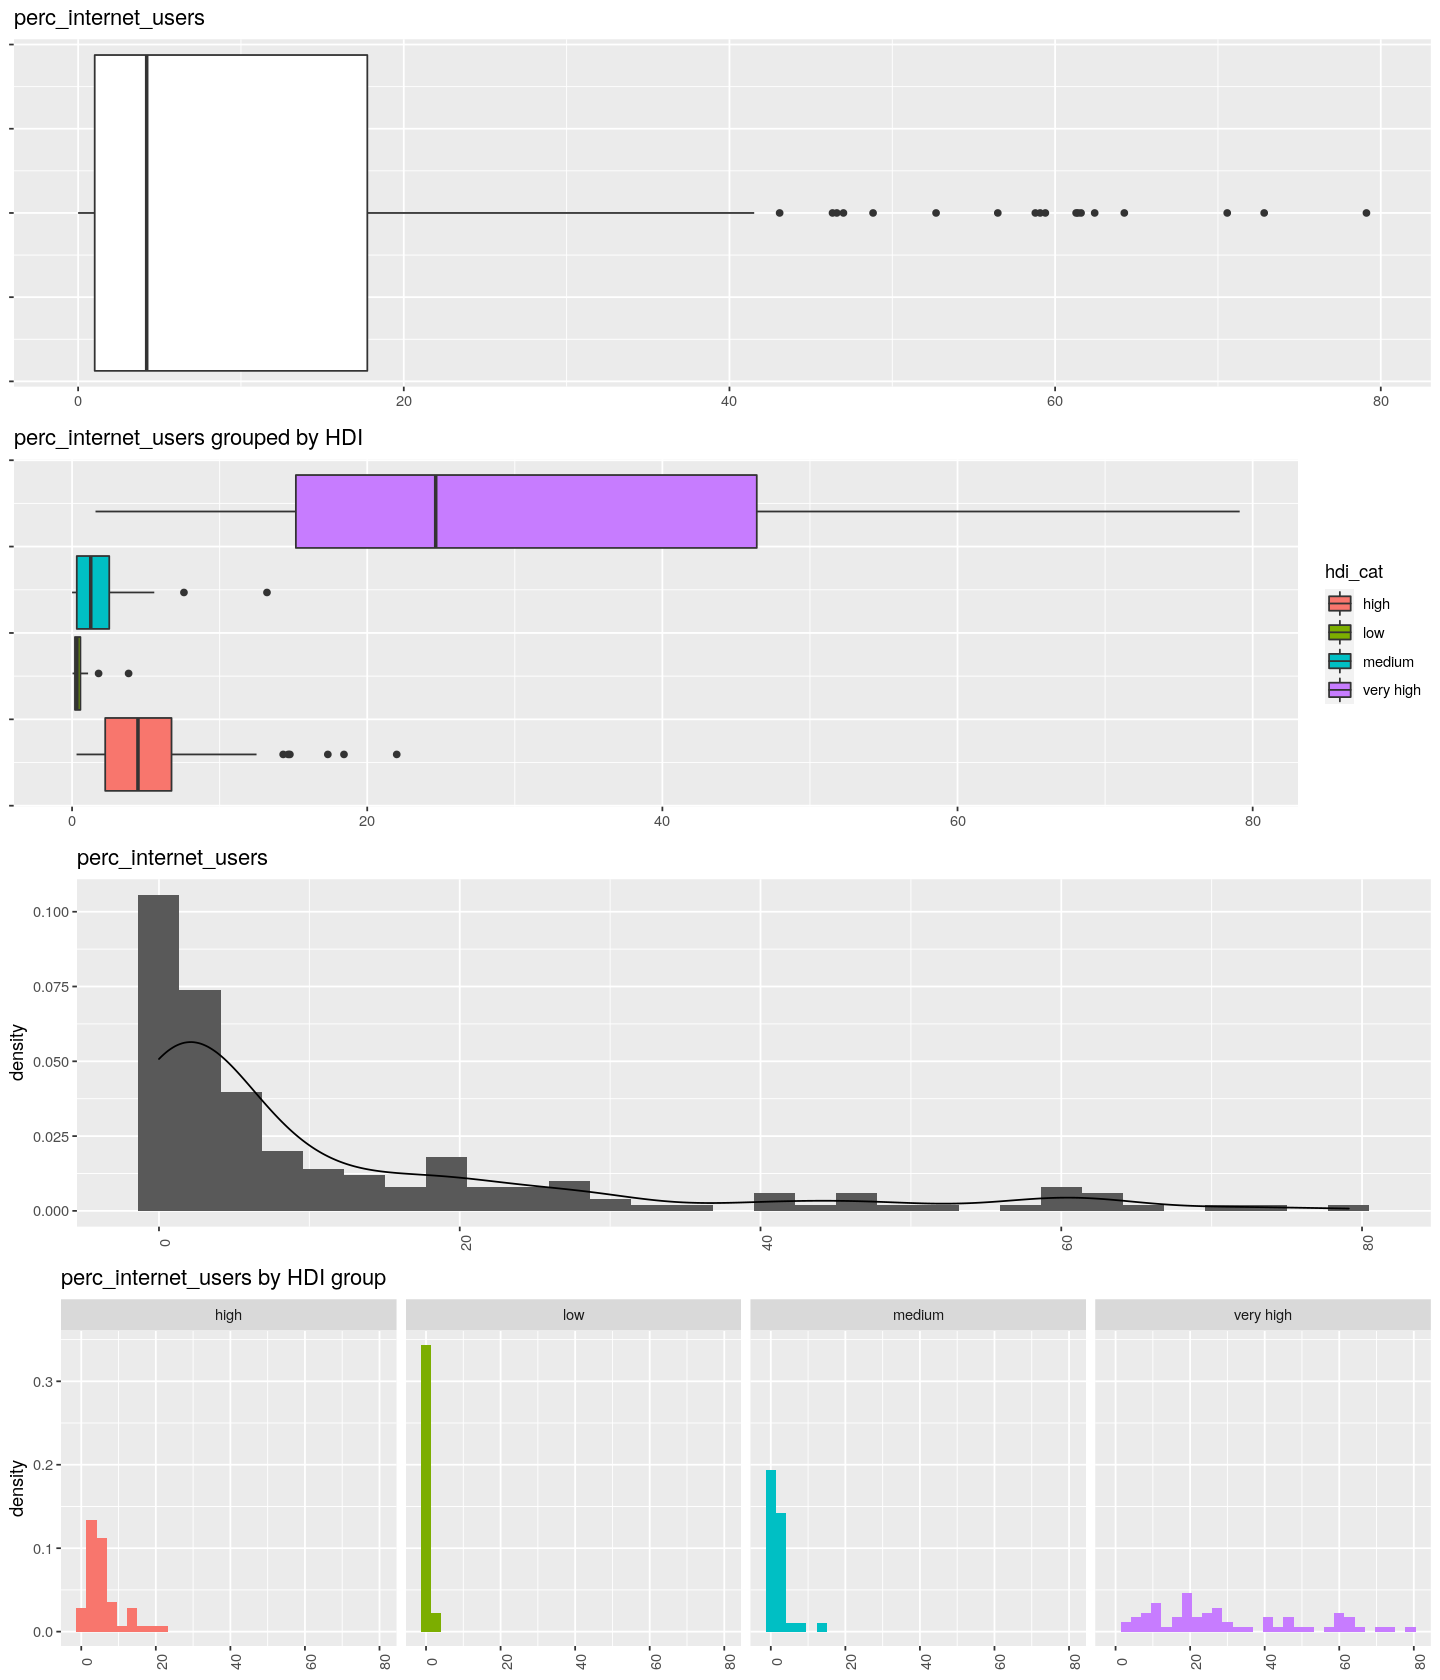

In [35]:
plots(dataset=df, col=cols[10], hist=c(TRUE,TRUE), density=c(TRUE,FALSE), bins=c(30,30), fw=TRUE, sep=FALSE)

In [64]:
sd(df$perc_internet_users[df$hdi_cat == "very high"])

[1] 20.3815

### Access to electricity as percentage of population

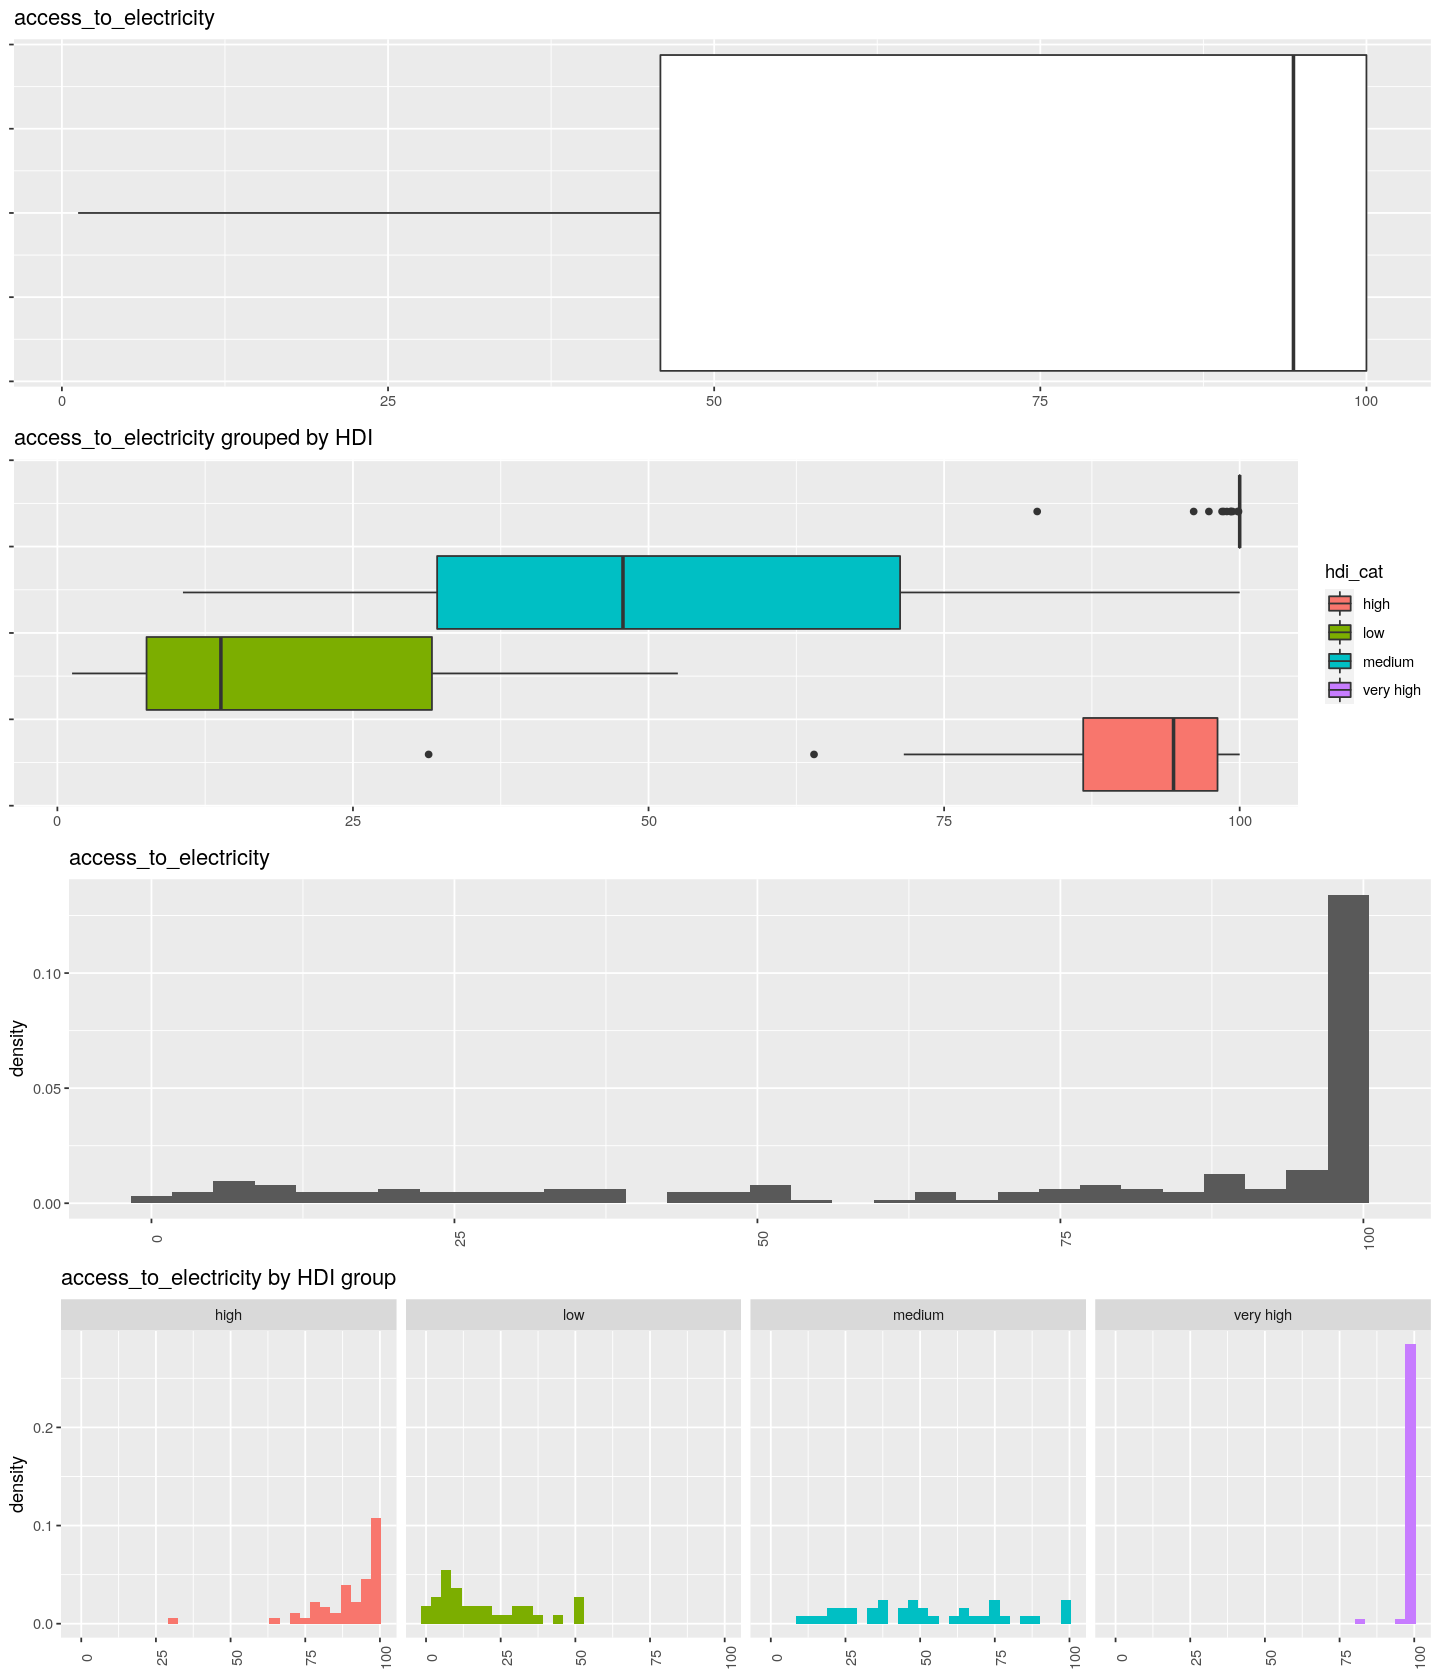

In [36]:
plots(dataset=df, col=cols[11], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), bins=c(30,30), fw=TRUE, sep=FALSE)

### Percentage of agricultural land

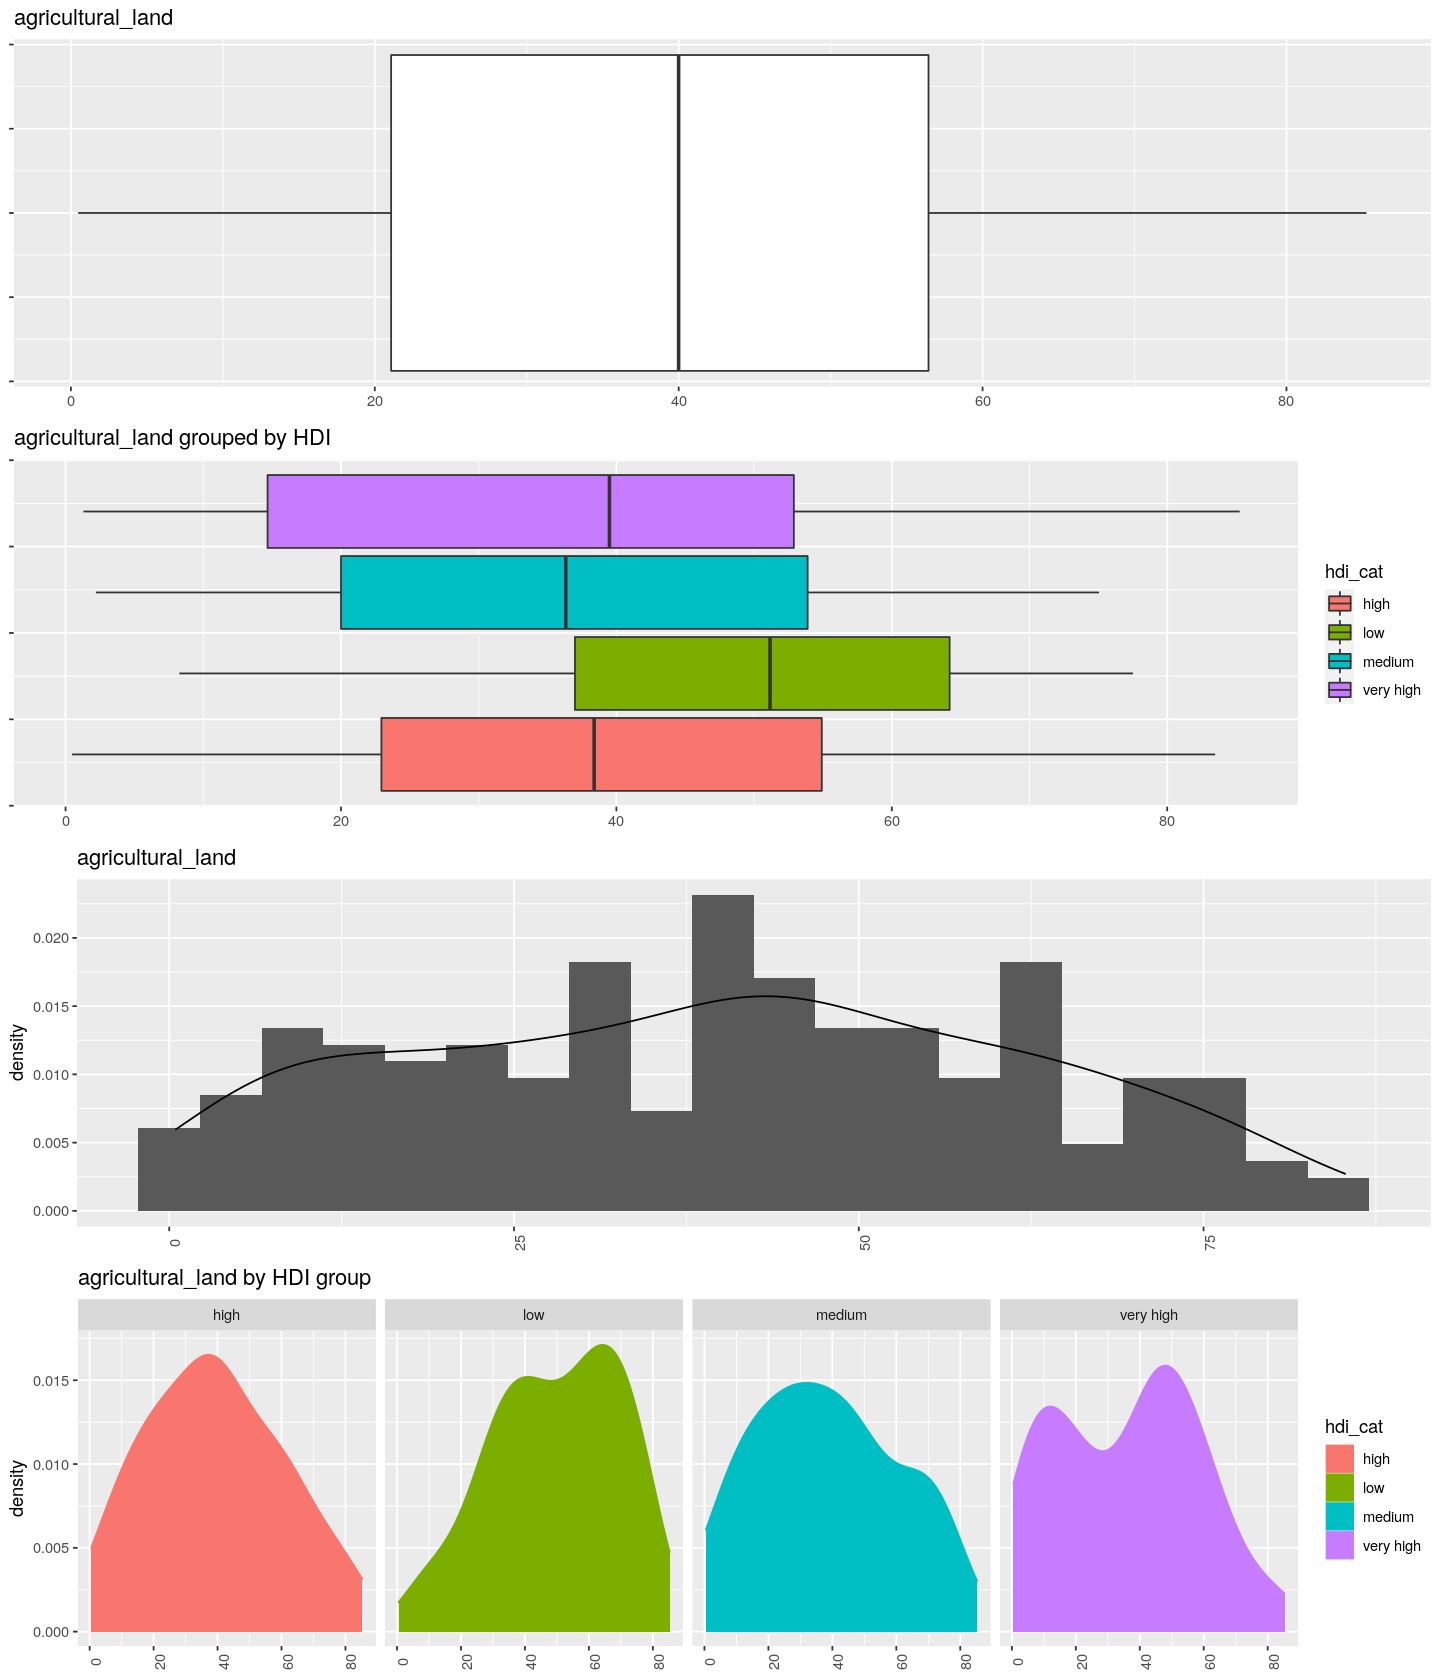

In [37]:
plots(dataset=df, col=cols[12], hist=c(TRUE,FALSE), density=c(TRUE,TRUE), bins=c(20,30), fw=TRUE, sep=FALSE)

### Crude birth rate

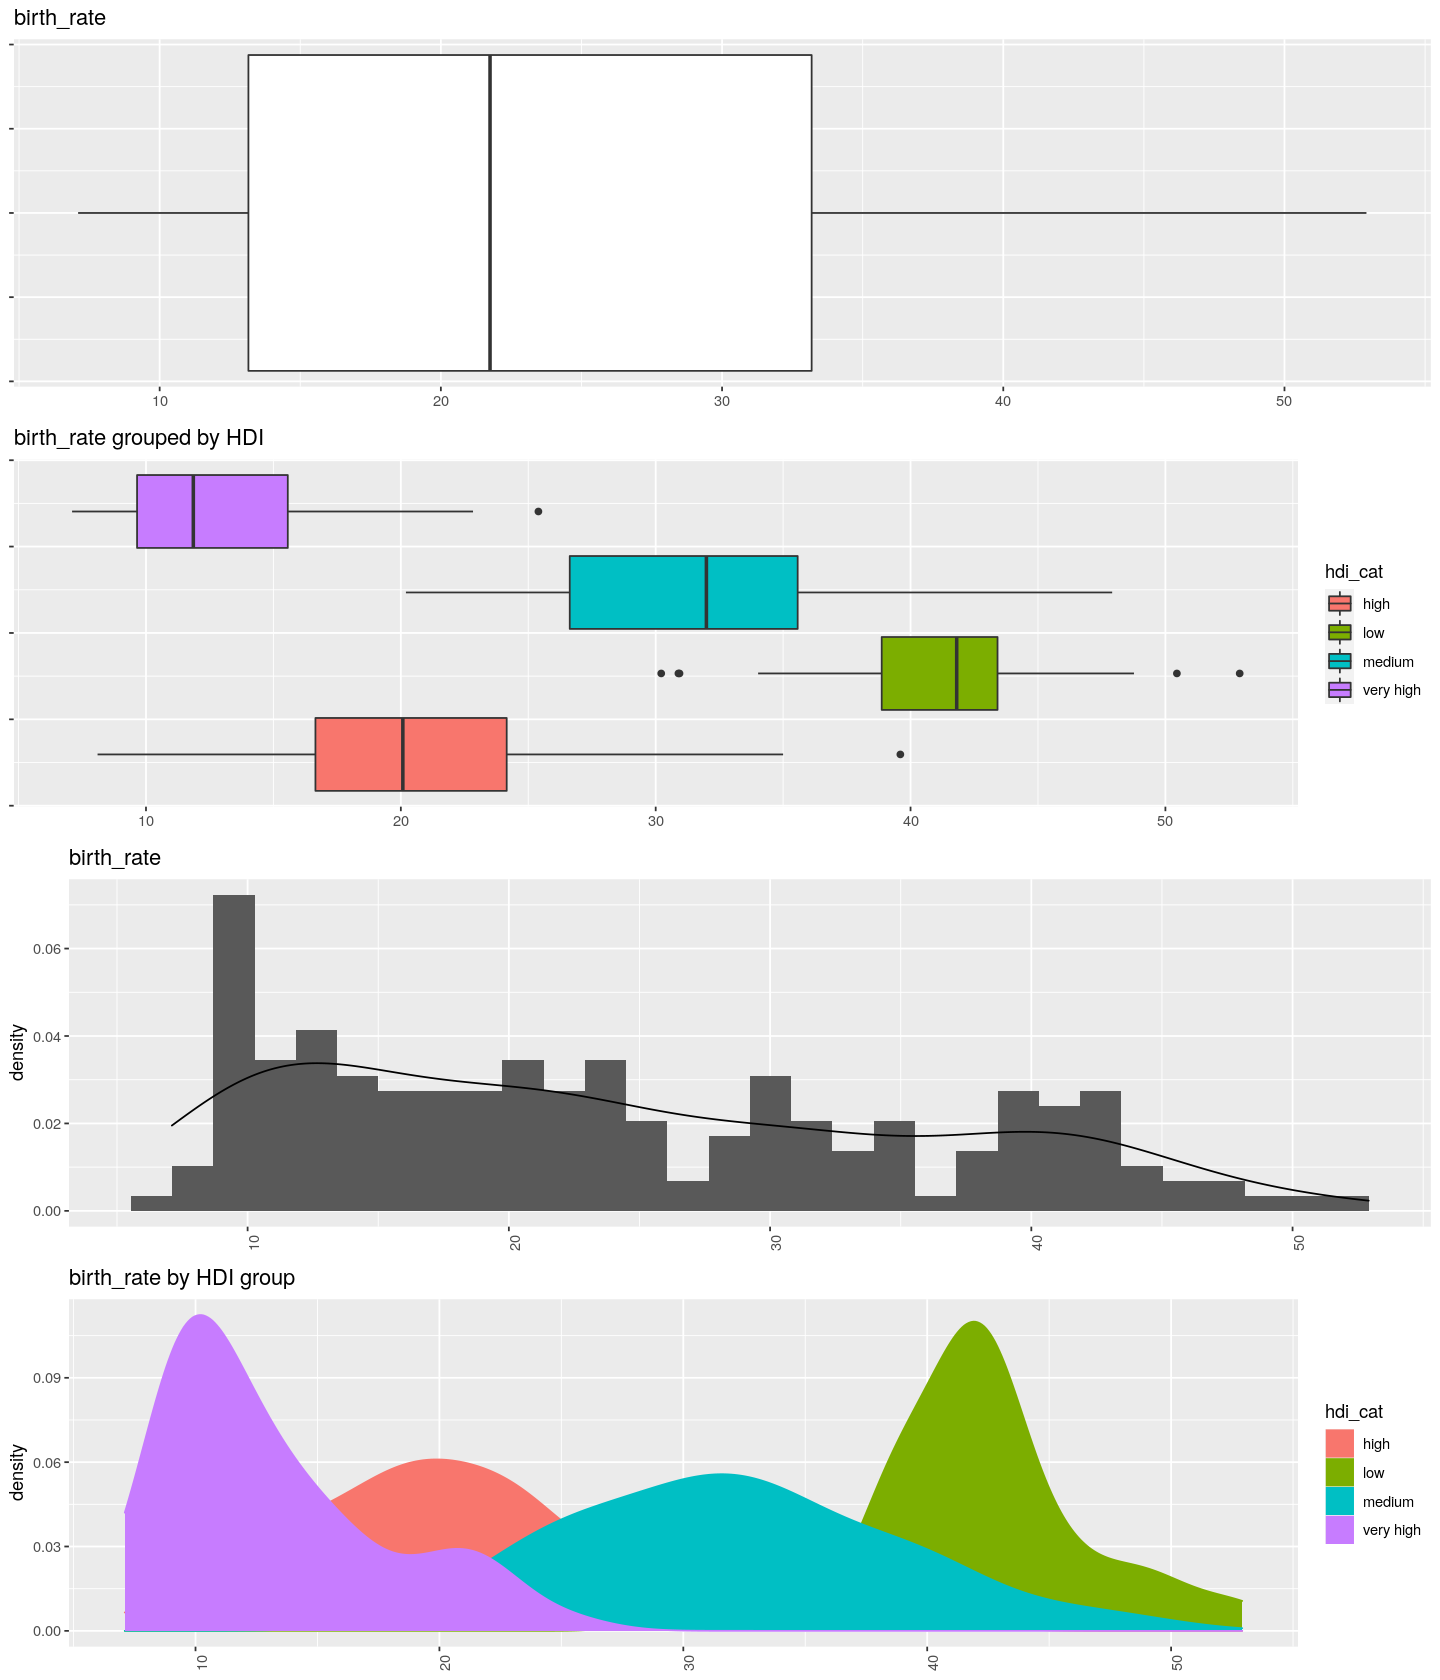

In [38]:
plots(dataset=df, col=cols[13], hist=c(TRUE,FALSE), density=c(TRUE,TRUE), bins=c(30,30), fw=FALSE, sep=FALSE)

### Gross national expenditure as a percentage of GDP

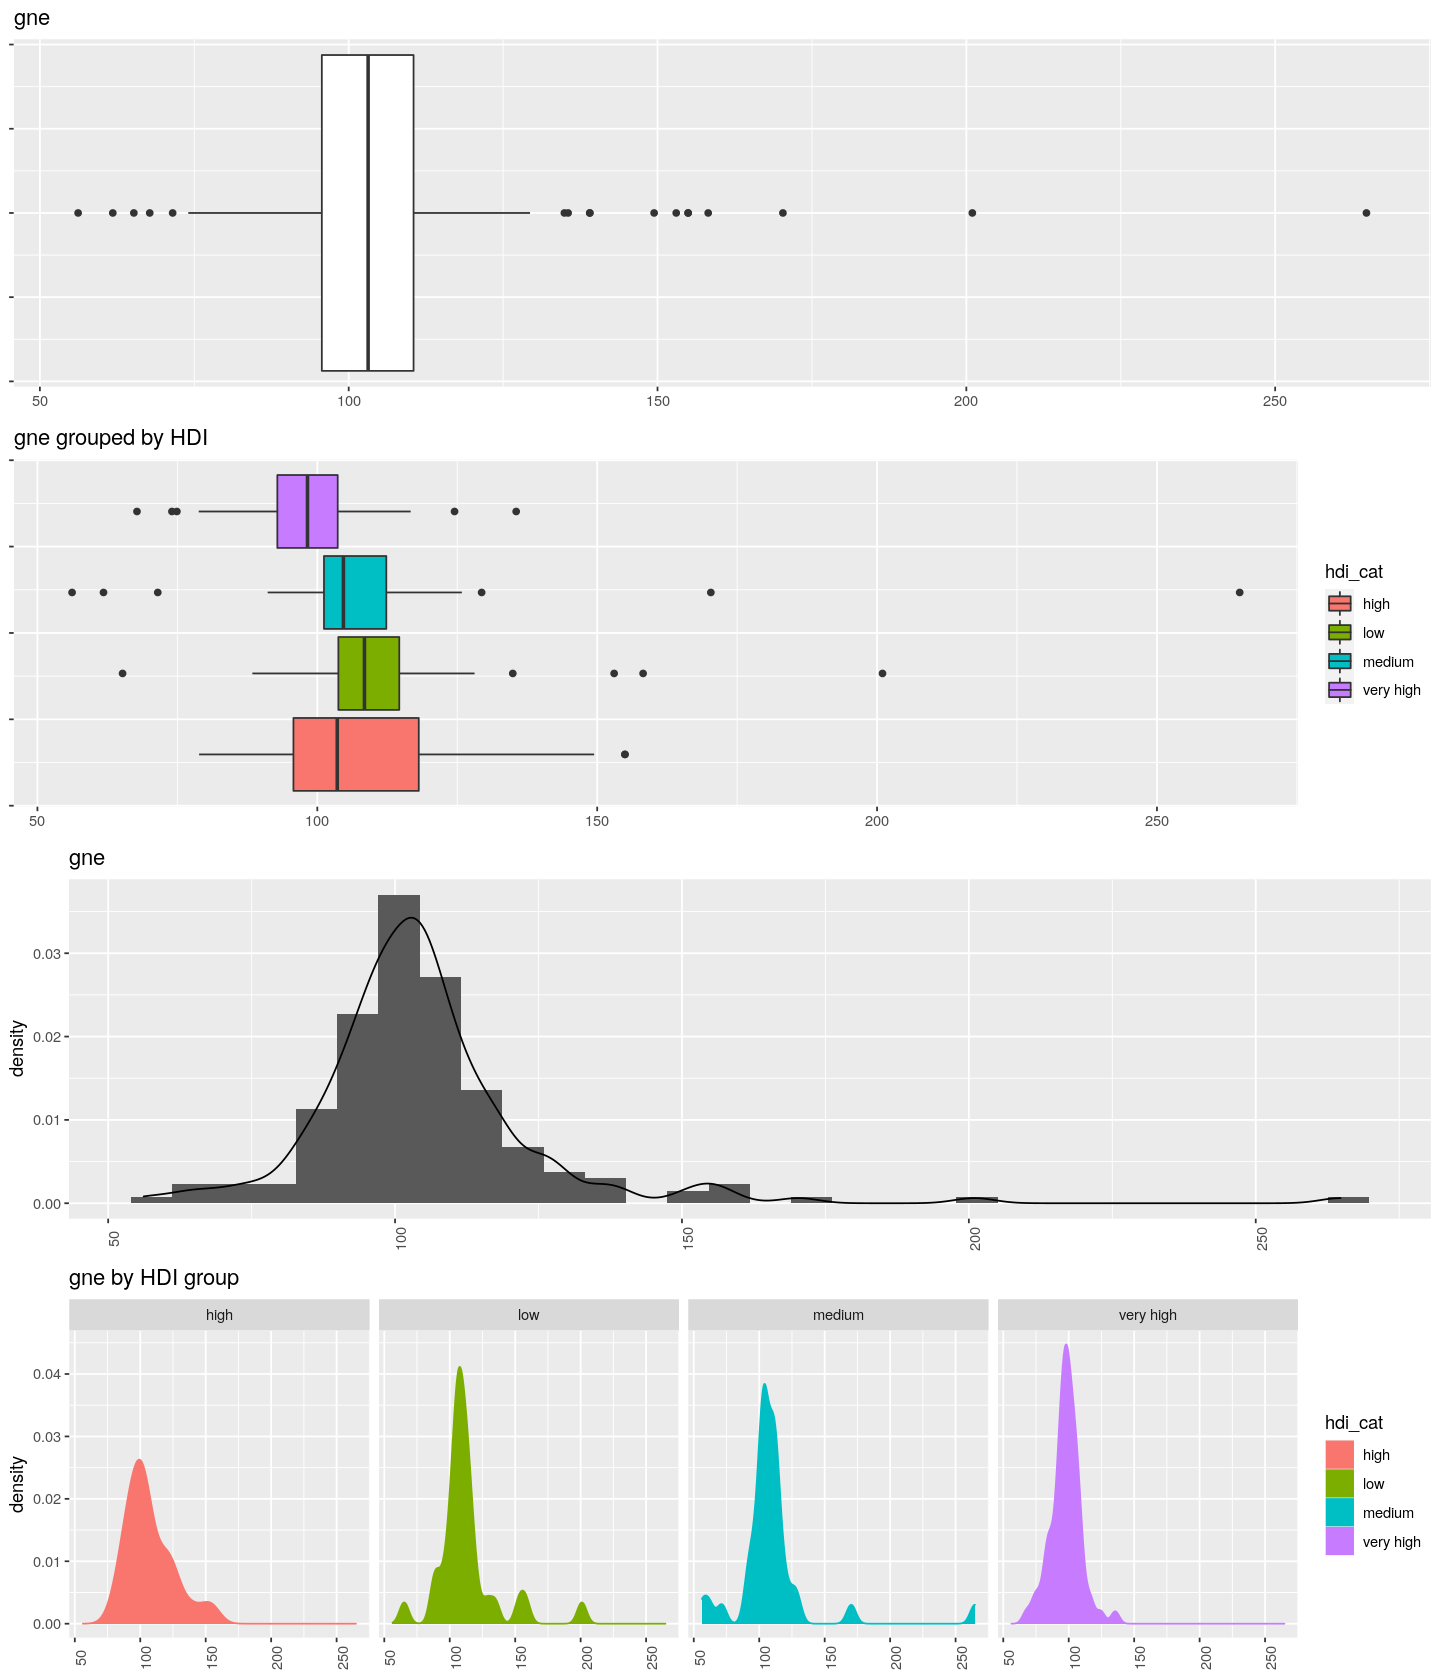

In [39]:
plots(dataset=df, col=cols[14], hist=c(TRUE,FALSE), density=c(TRUE,TRUE), bins=c(30,30), fw=TRUE, sep=FALSE)

### Mobile Cellular subscriptions per 100 people

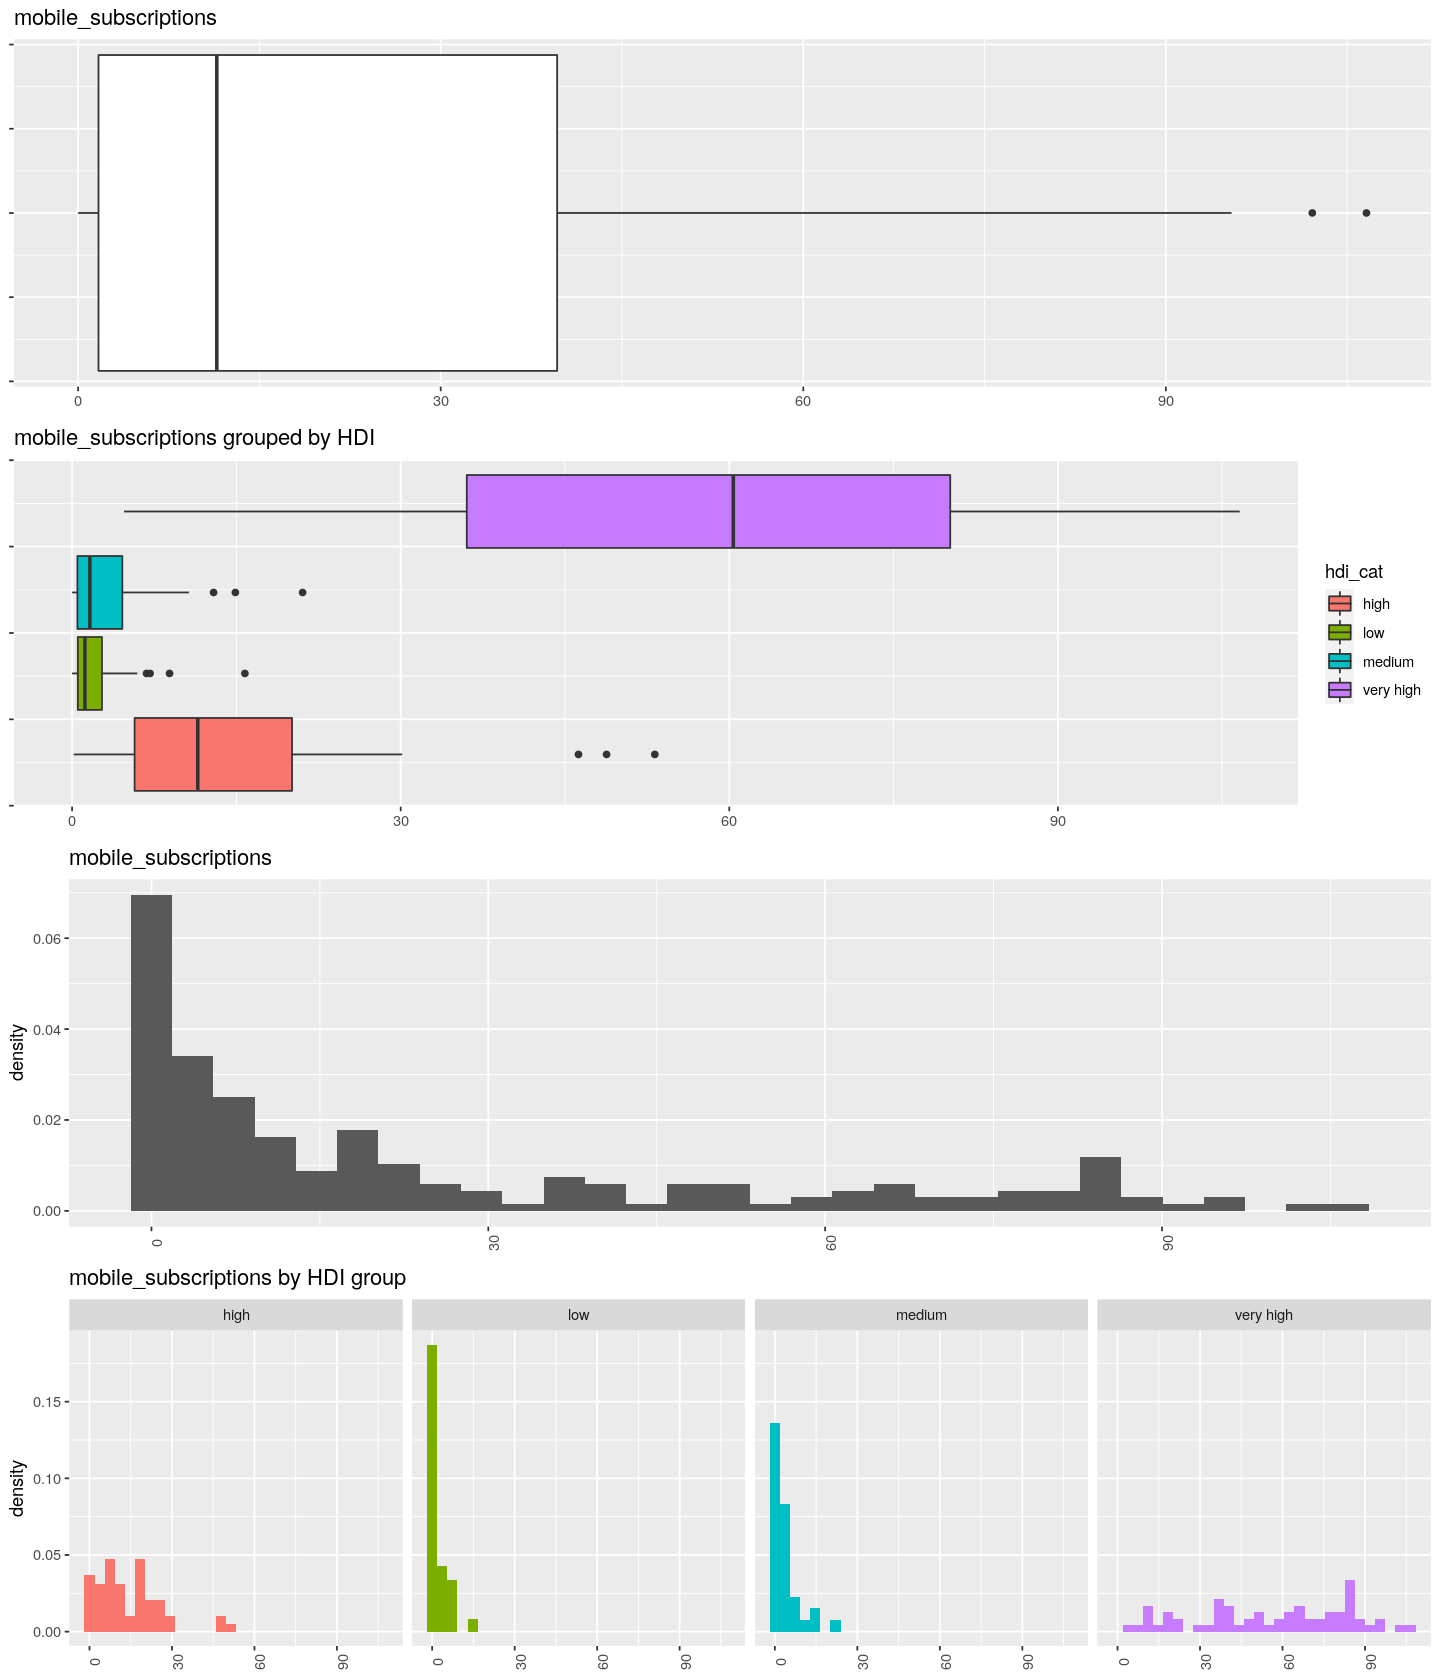

In [40]:
plots(dataset=df, col=cols[15], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), bins=c(30,30), fw=TRUE, sep=FALSE)

### Infant mortality rate

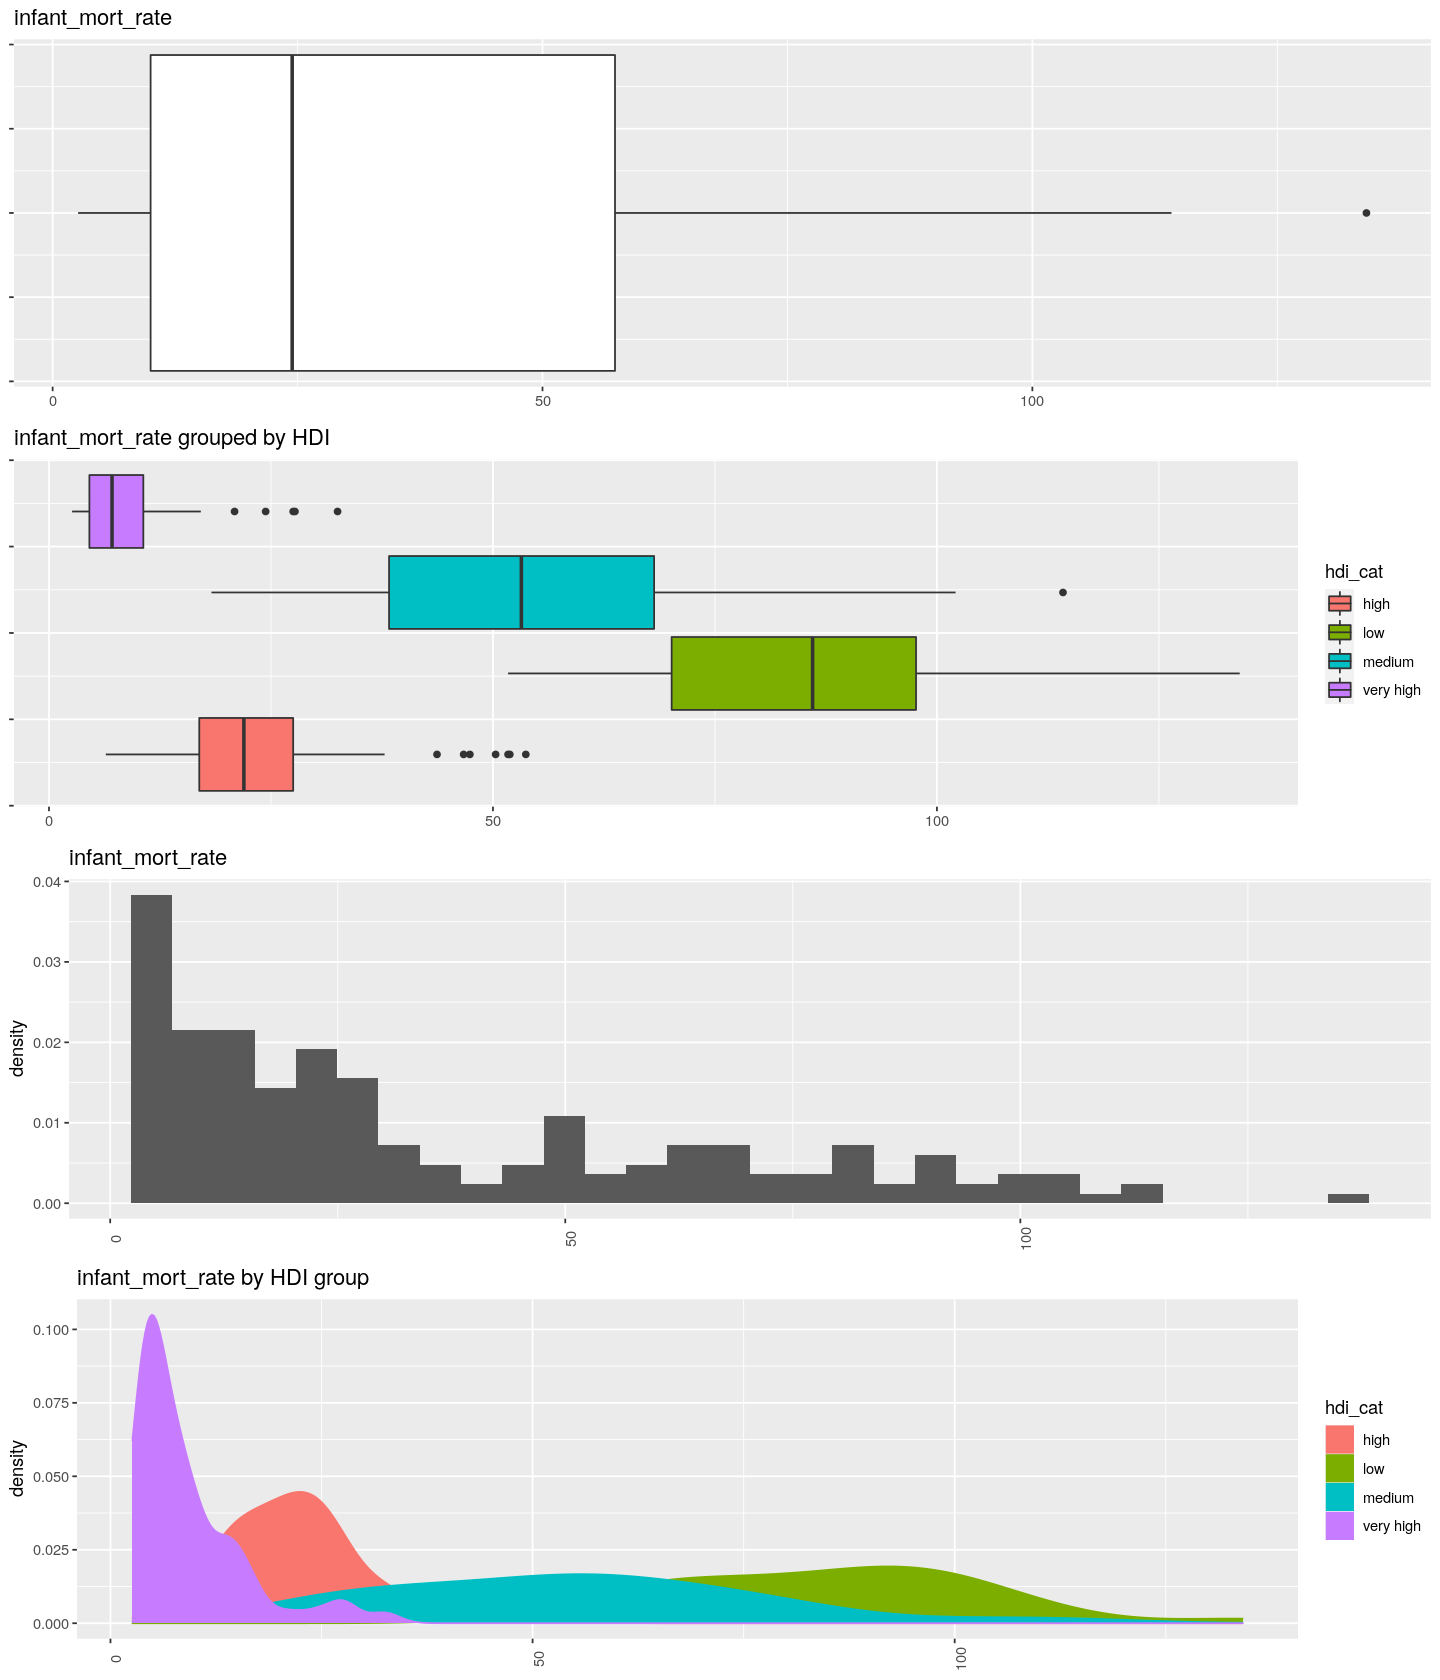

In [45]:
plots(dataset=df, col=cols[16], hist=c(TRUE,FALSE), density=c(FALSE,TRUE), bins=c(30,30), fw=FALSE, sep=FALSE)

### Sex ratio at birth

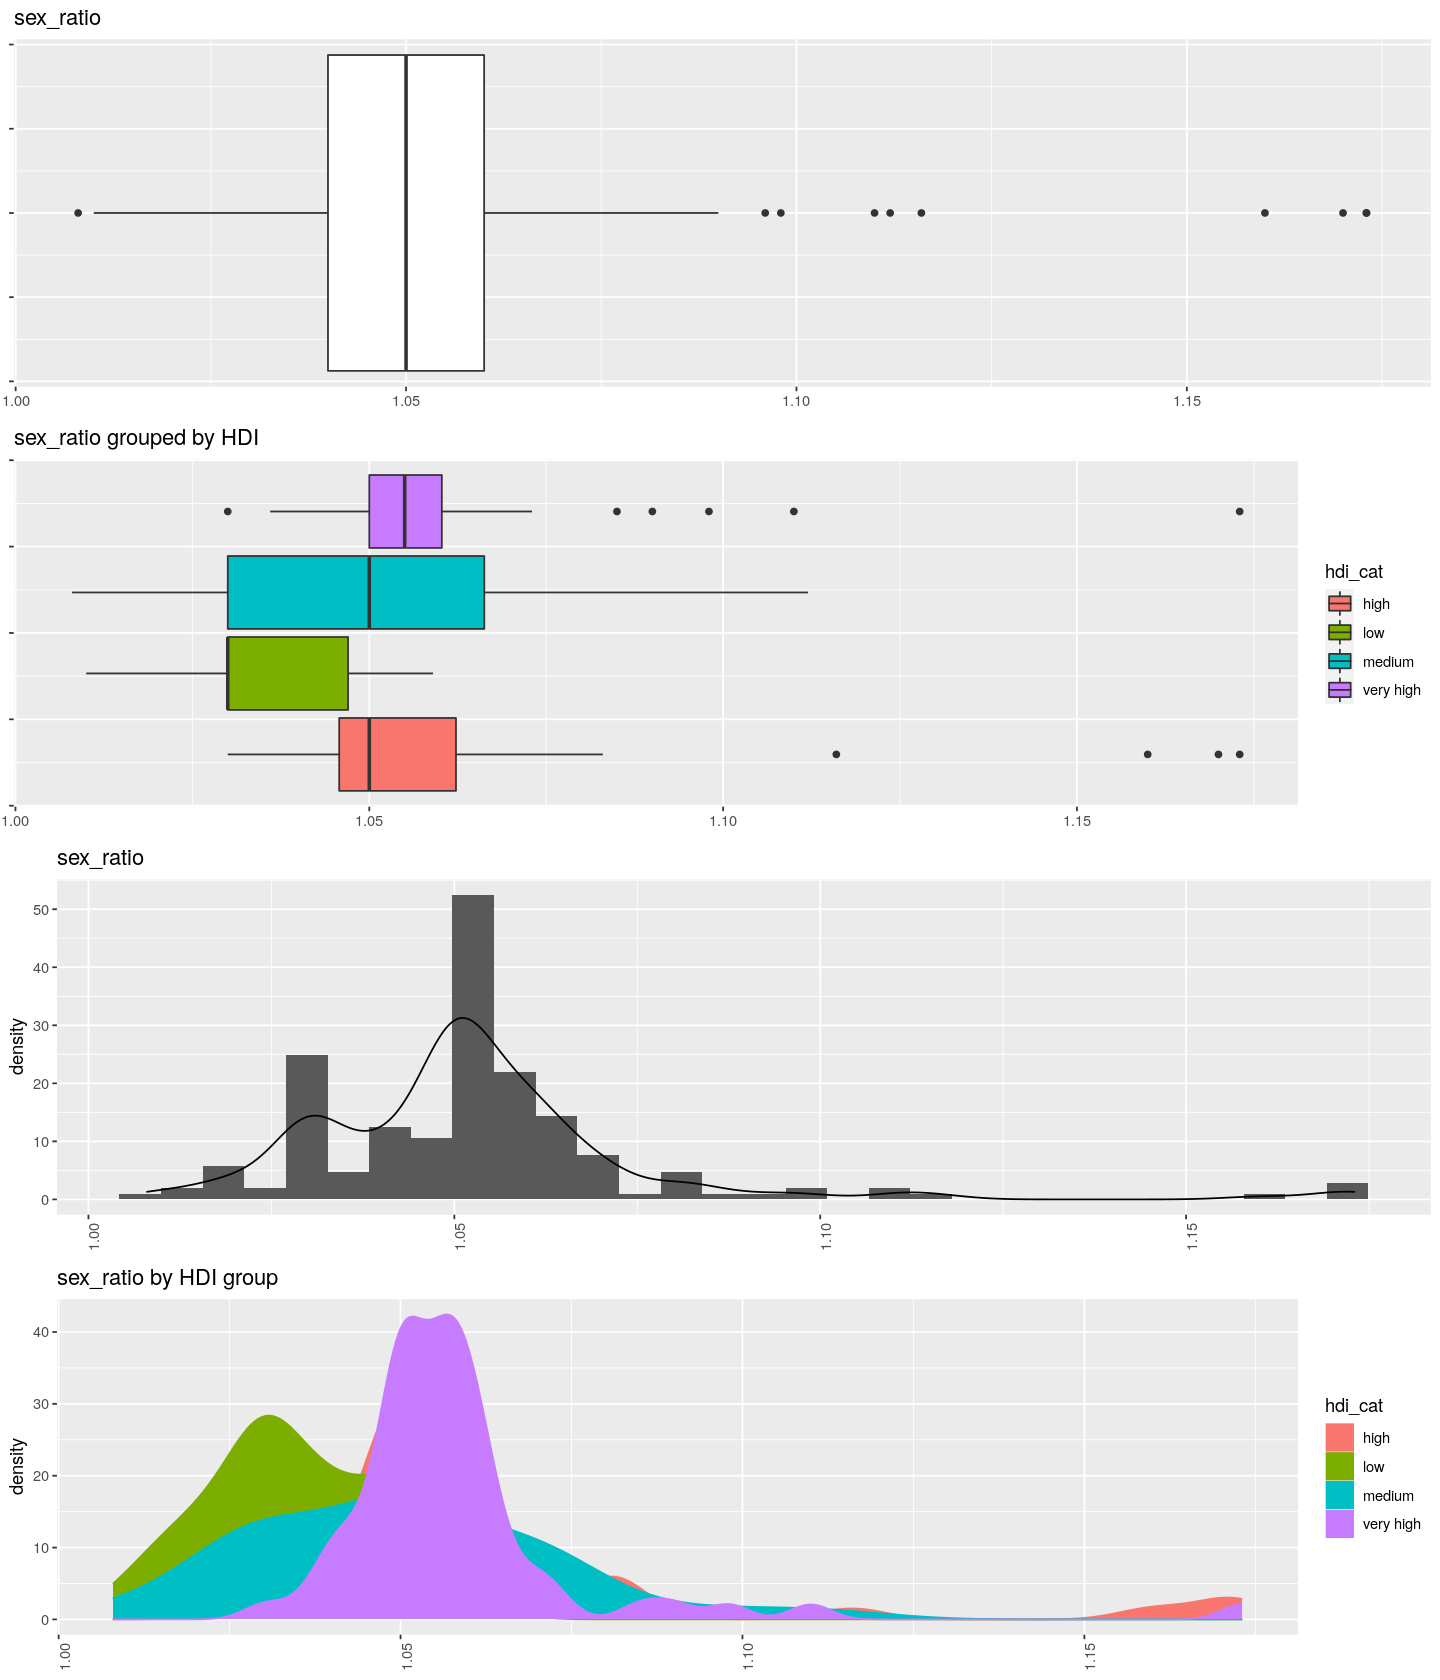

In [42]:
plots(dataset=df, col=cols[17], hist=c(TRUE,FALSE), density=c(TRUE,TRUE), bins=c(30,30), fw=FALSE, sep=FALSE)

### Greenhouse gas emissions

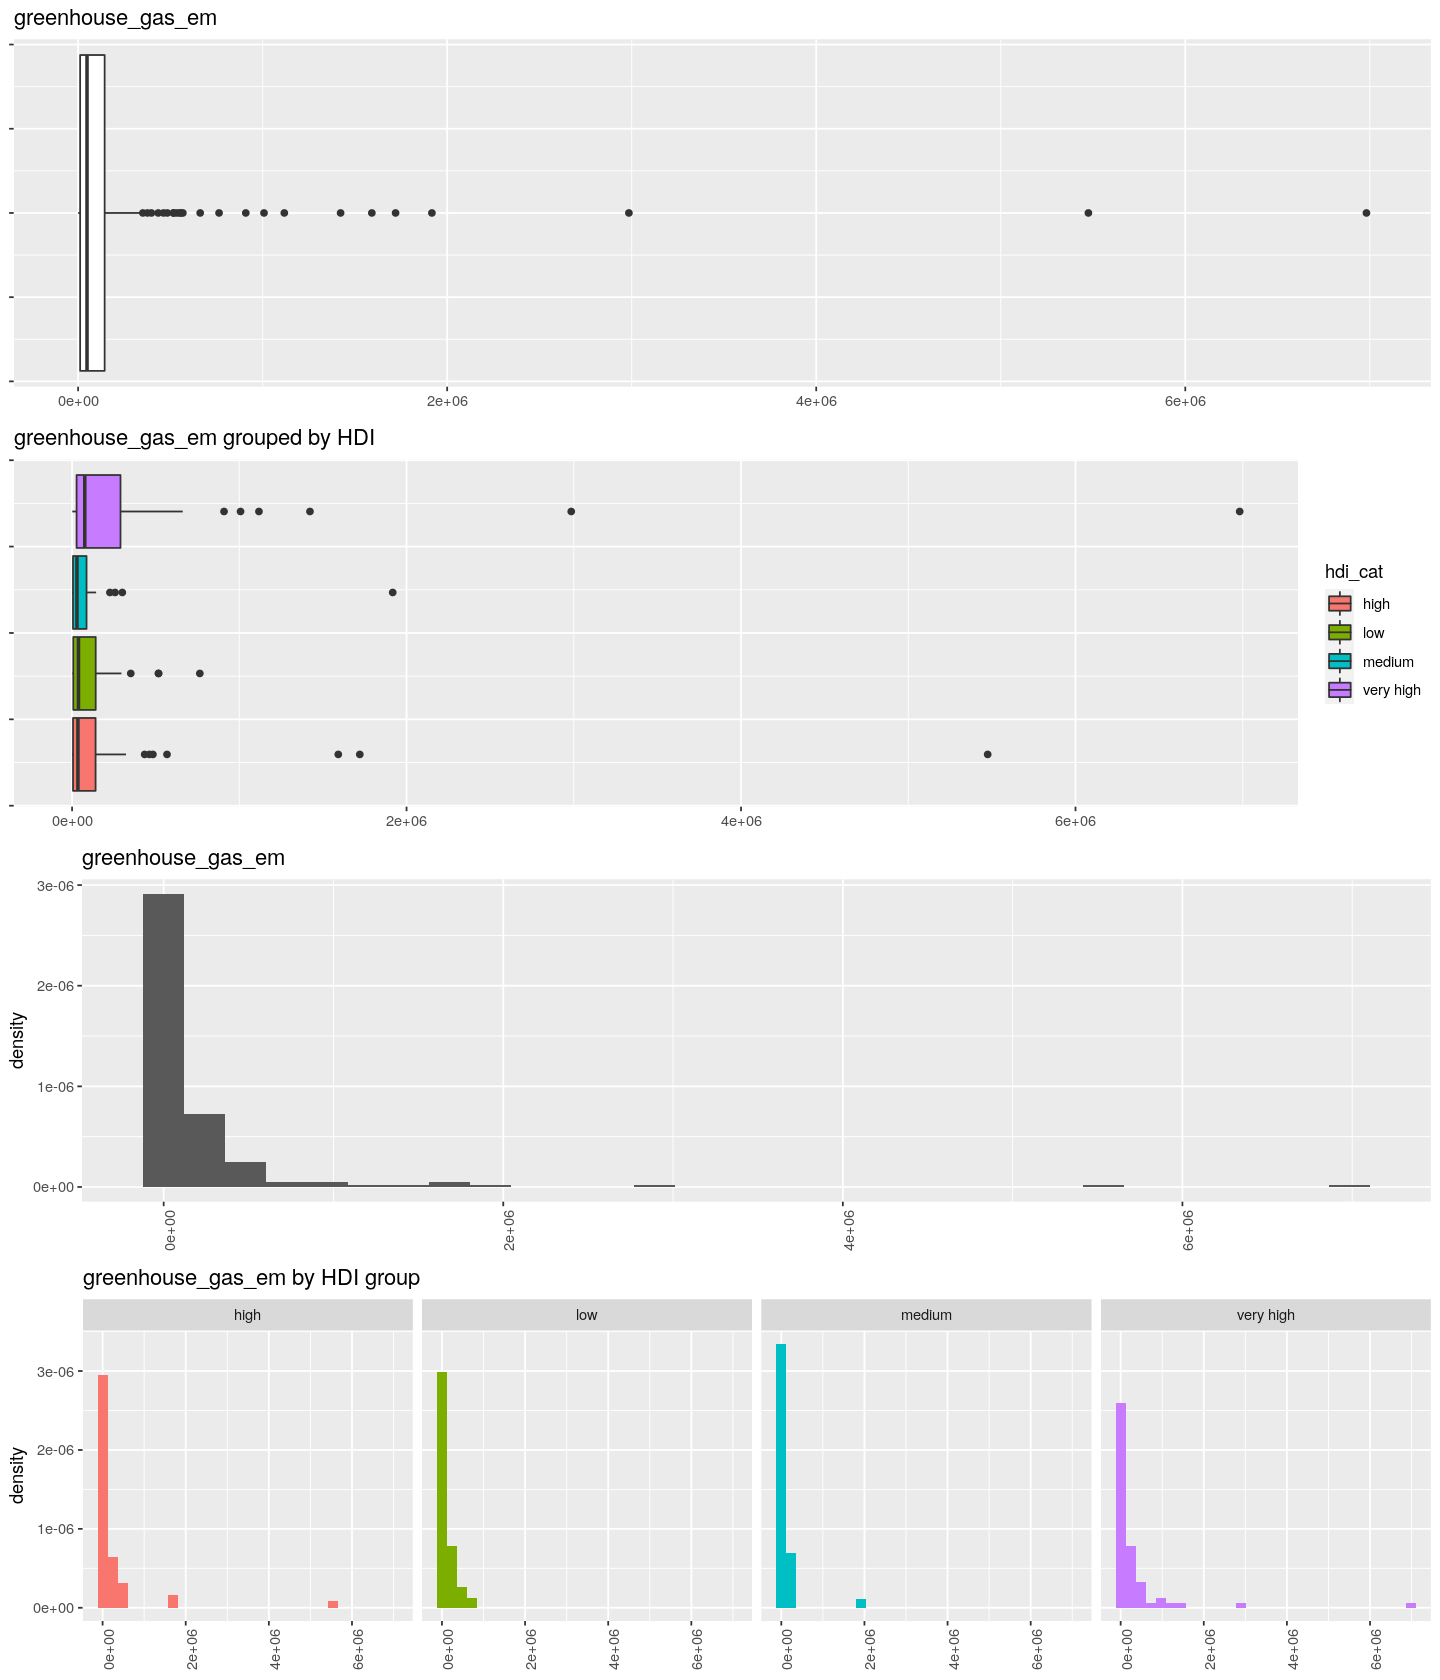

In [43]:
plots(dataset=df, col=cols[18], hist=c(TRUE,TRUE), density=c(FALSE,FALSE), bins=c(30,30), fw=TRUE, sep=FALSE)

### Percentage of urban population

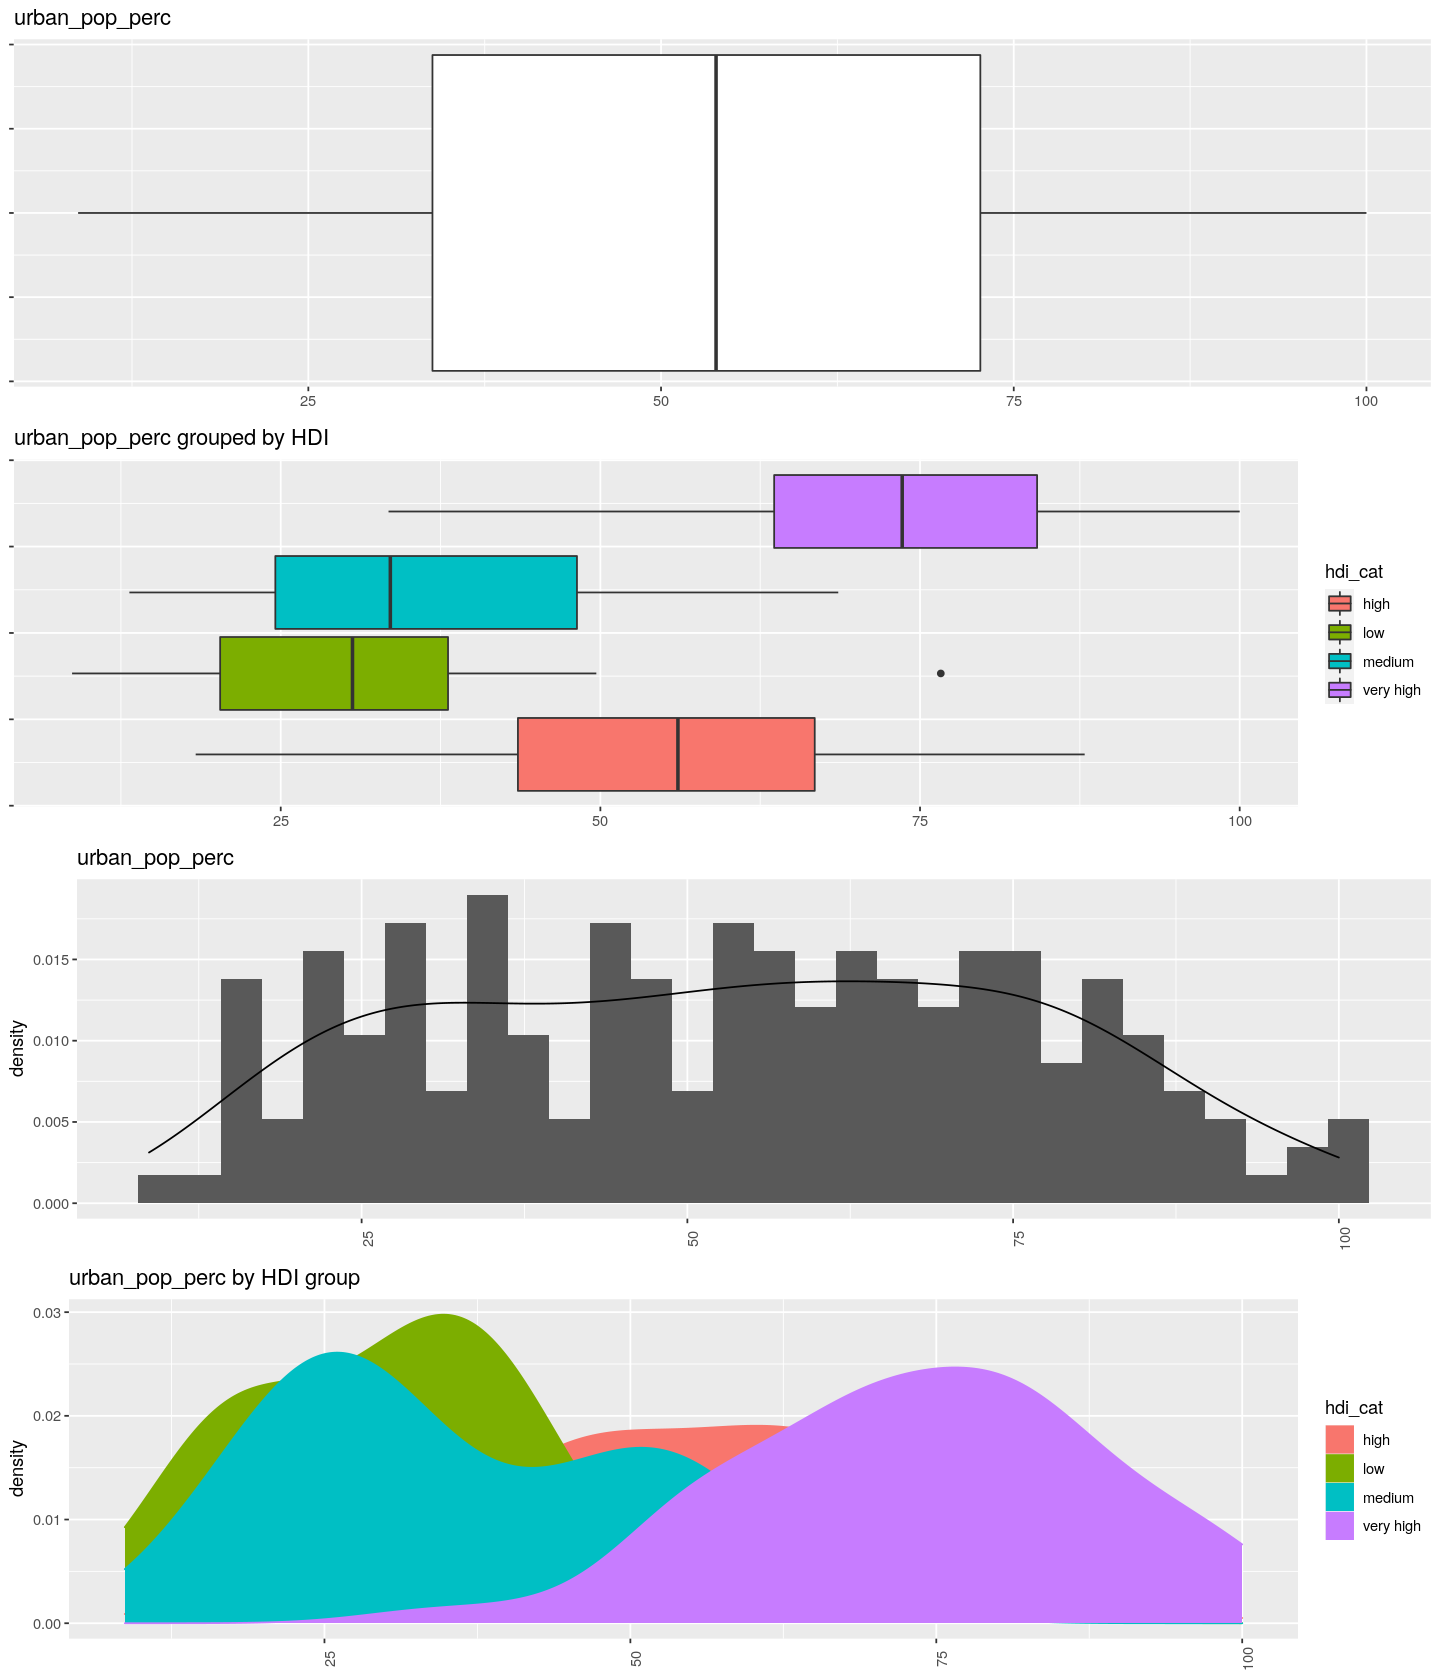

In [44]:
plots(dataset=df, col=cols[19], hist=c(TRUE,FALSE), density=c(TRUE,TRUE), bins=c(30,30), fw=FALSE, sep=FALSE)

## Correlation plots

### General correlation plot (pearson)

In [209]:
# setting plot size
options(repr.plot.width=14, repr.plot.height=14)

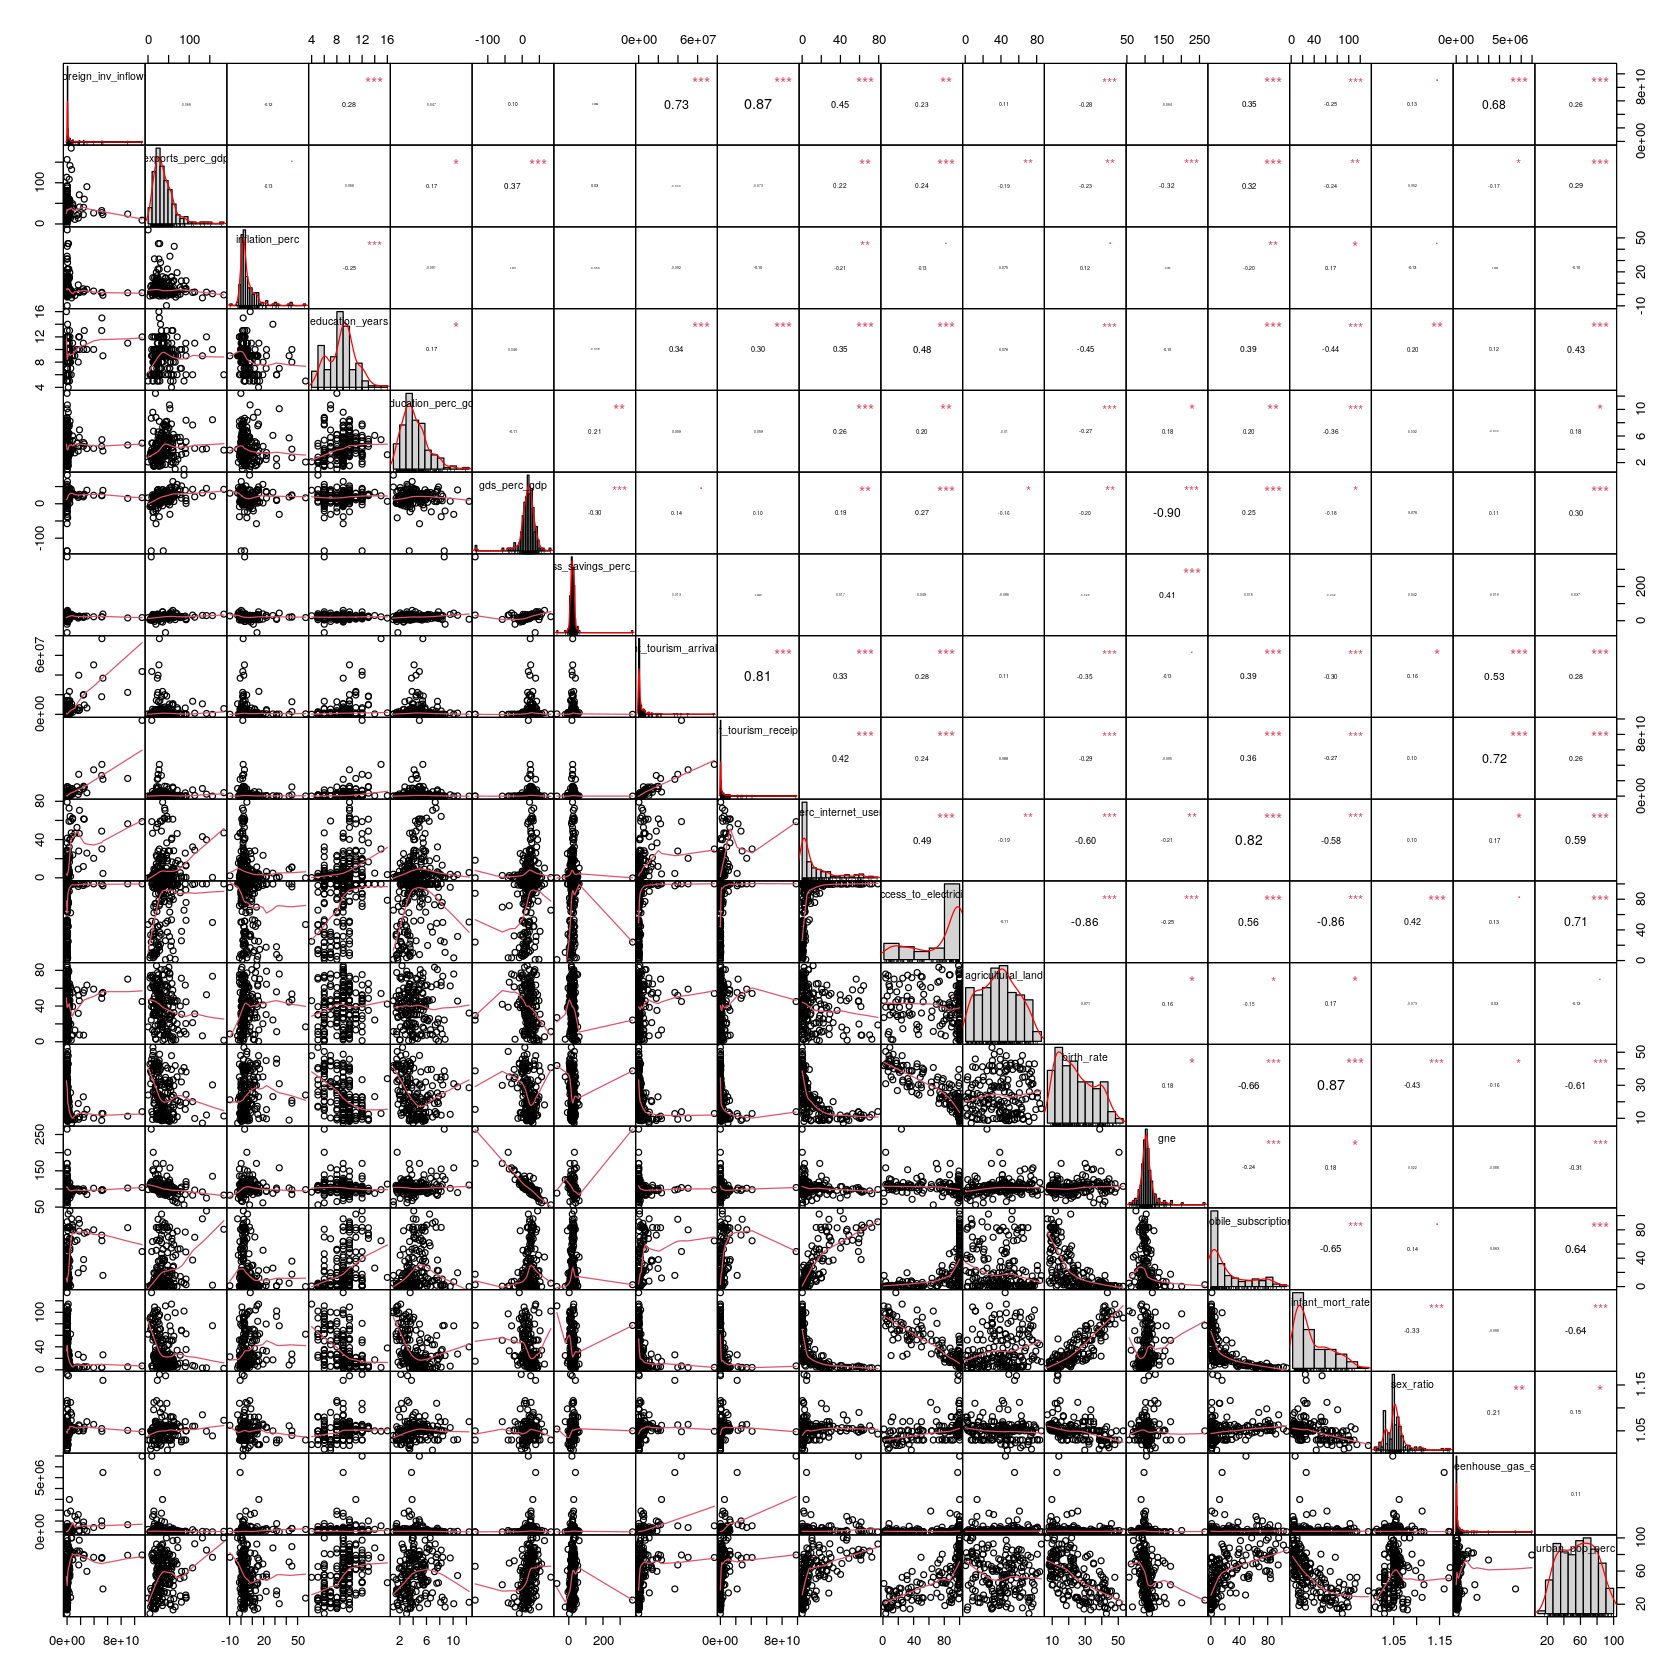

In [210]:
pa <- df %>% dplyr::select(cols)
chart.Correlation(pa, histogram=TRUE, pch=19, method="pearson")

### Correlation matrix plot segregated by HDI

In [211]:
unique(cbind(df$hdi_cat, hdi_colours))

hdi_colours
[1,] high      blueviolet 
[2,] medium    black      
[3,] very high green      
[4,] low       red

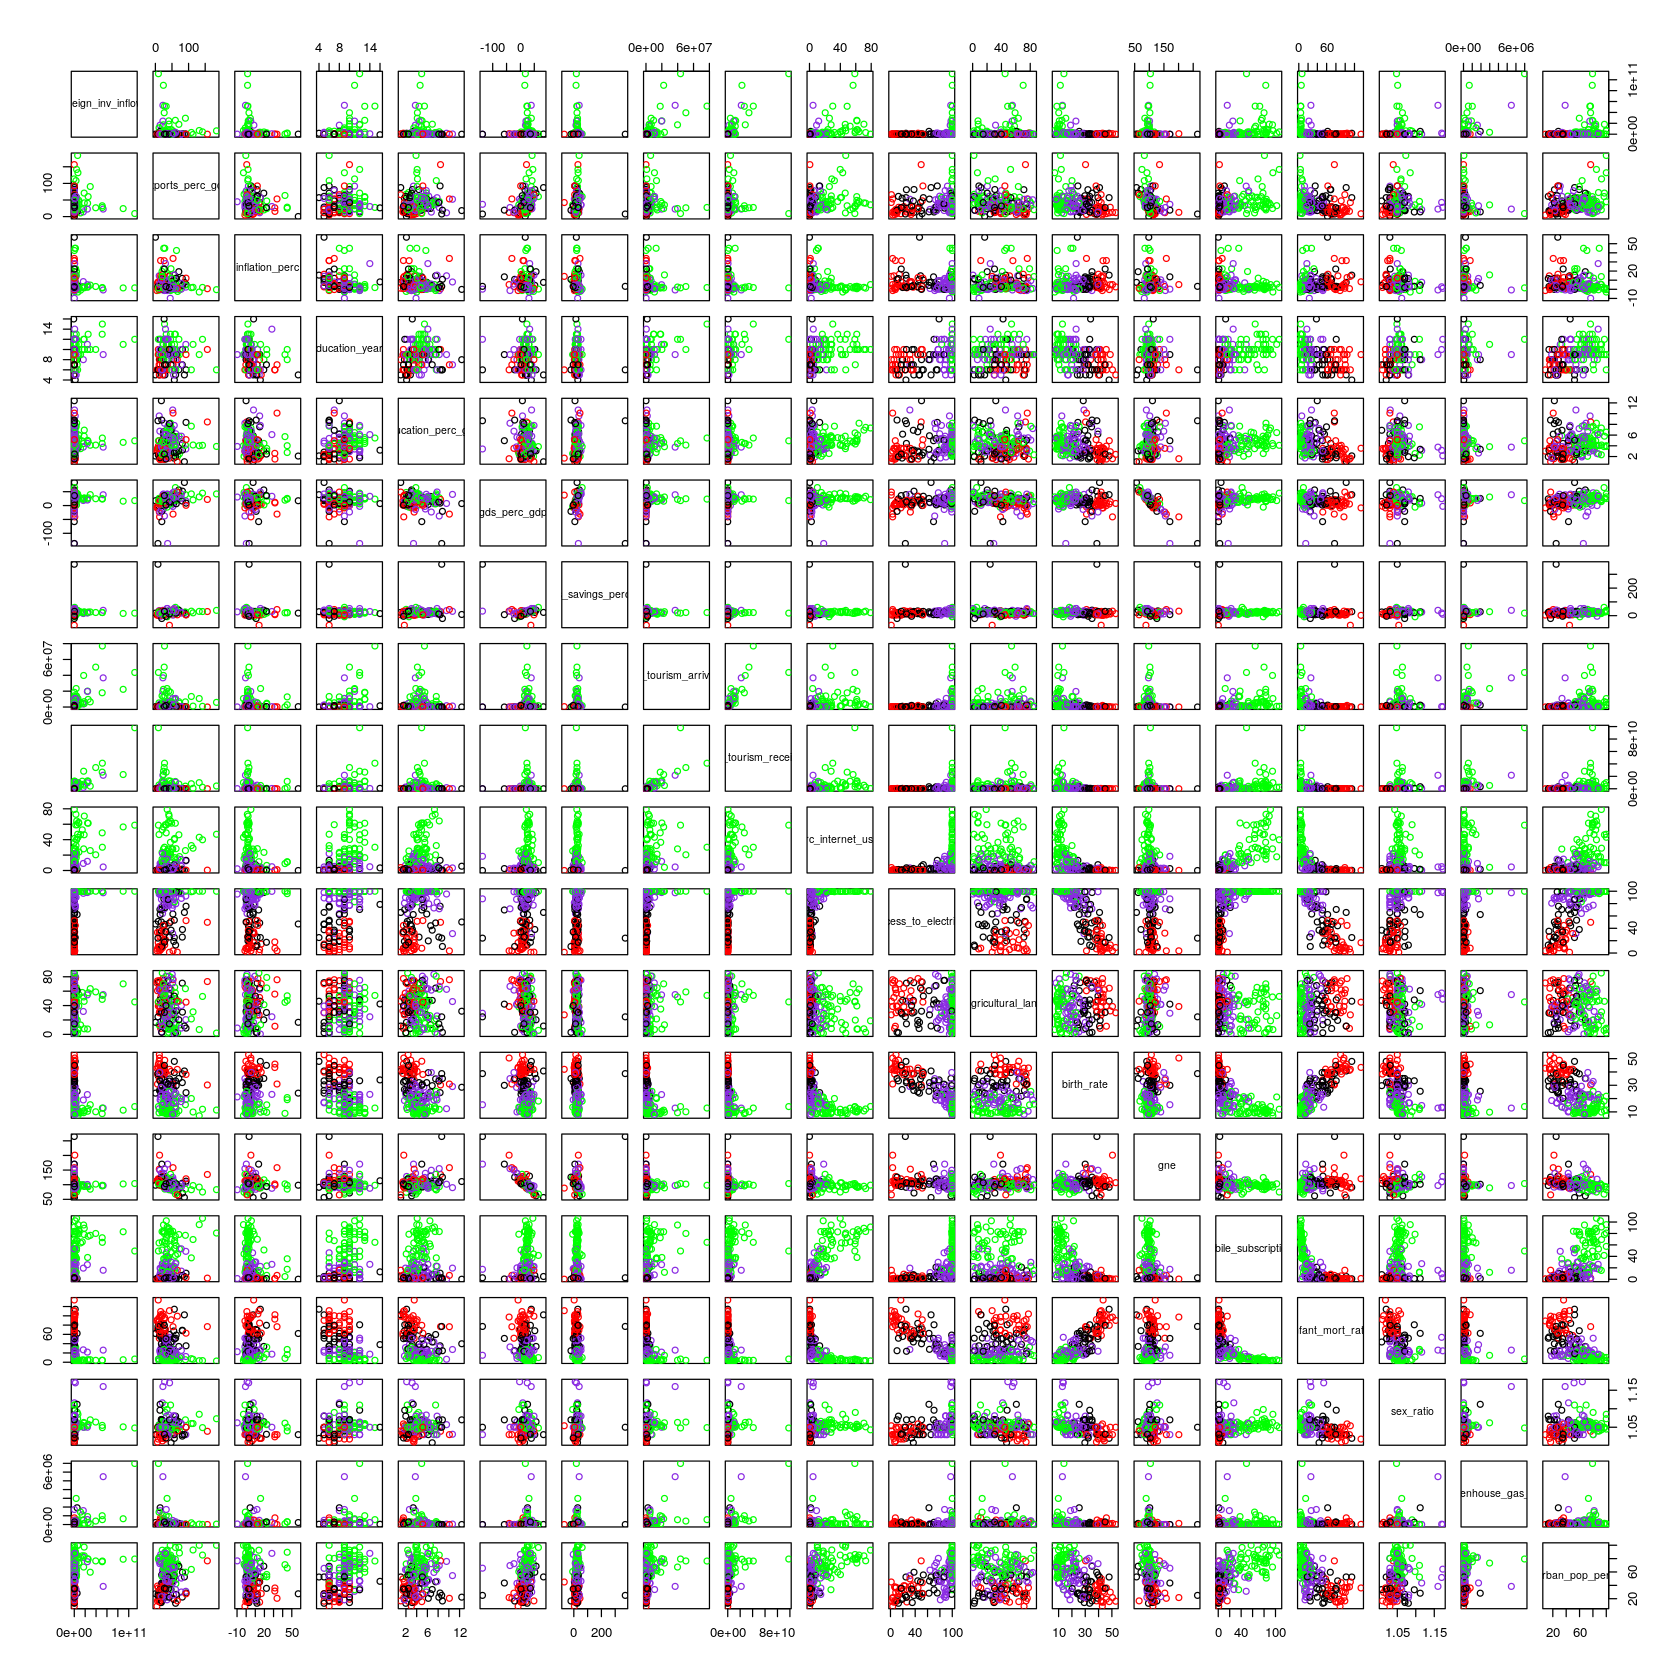

In [212]:
pairs(pa,pch=1,col=hdi_colours)

### Calculating (max) correlation using multiple methods 

In [214]:
methods = c('kendall','spearman','pearson')
corr_mat = matrix(rep(0,(length(cols)^2)*4), nrow=length(cols)^2)
corr_mat = corr_mat %>% data.frame() %>% setNames(c('var1','var2','coef','corr_type'))
cnt = 0
for (i in 1:length(cols)) {
    for (j in 1:length(cols)) {
        cnt = cnt + 1
        comb1 <- df %>% select(cols[i])
        comb2 <- df %>% select(cols[j])
        maximum_cor = 0
        method_used = ''
        for (method in methods) {
            correl <- cor(comb1[,1],comb2[,1], method=method)
            if (abs(correl) > abs(maximum_cor)) {
                maximum_cor <- correl
                method_used = method
            }
        }
        corr_mat$coef[cnt] = maximum_cor
        corr_mat$var1[cnt] = cols[i]
        corr_mat$var2[cnt] = cols[j]
        corr_mat$corr_type[cnt] = method_used
    }
}

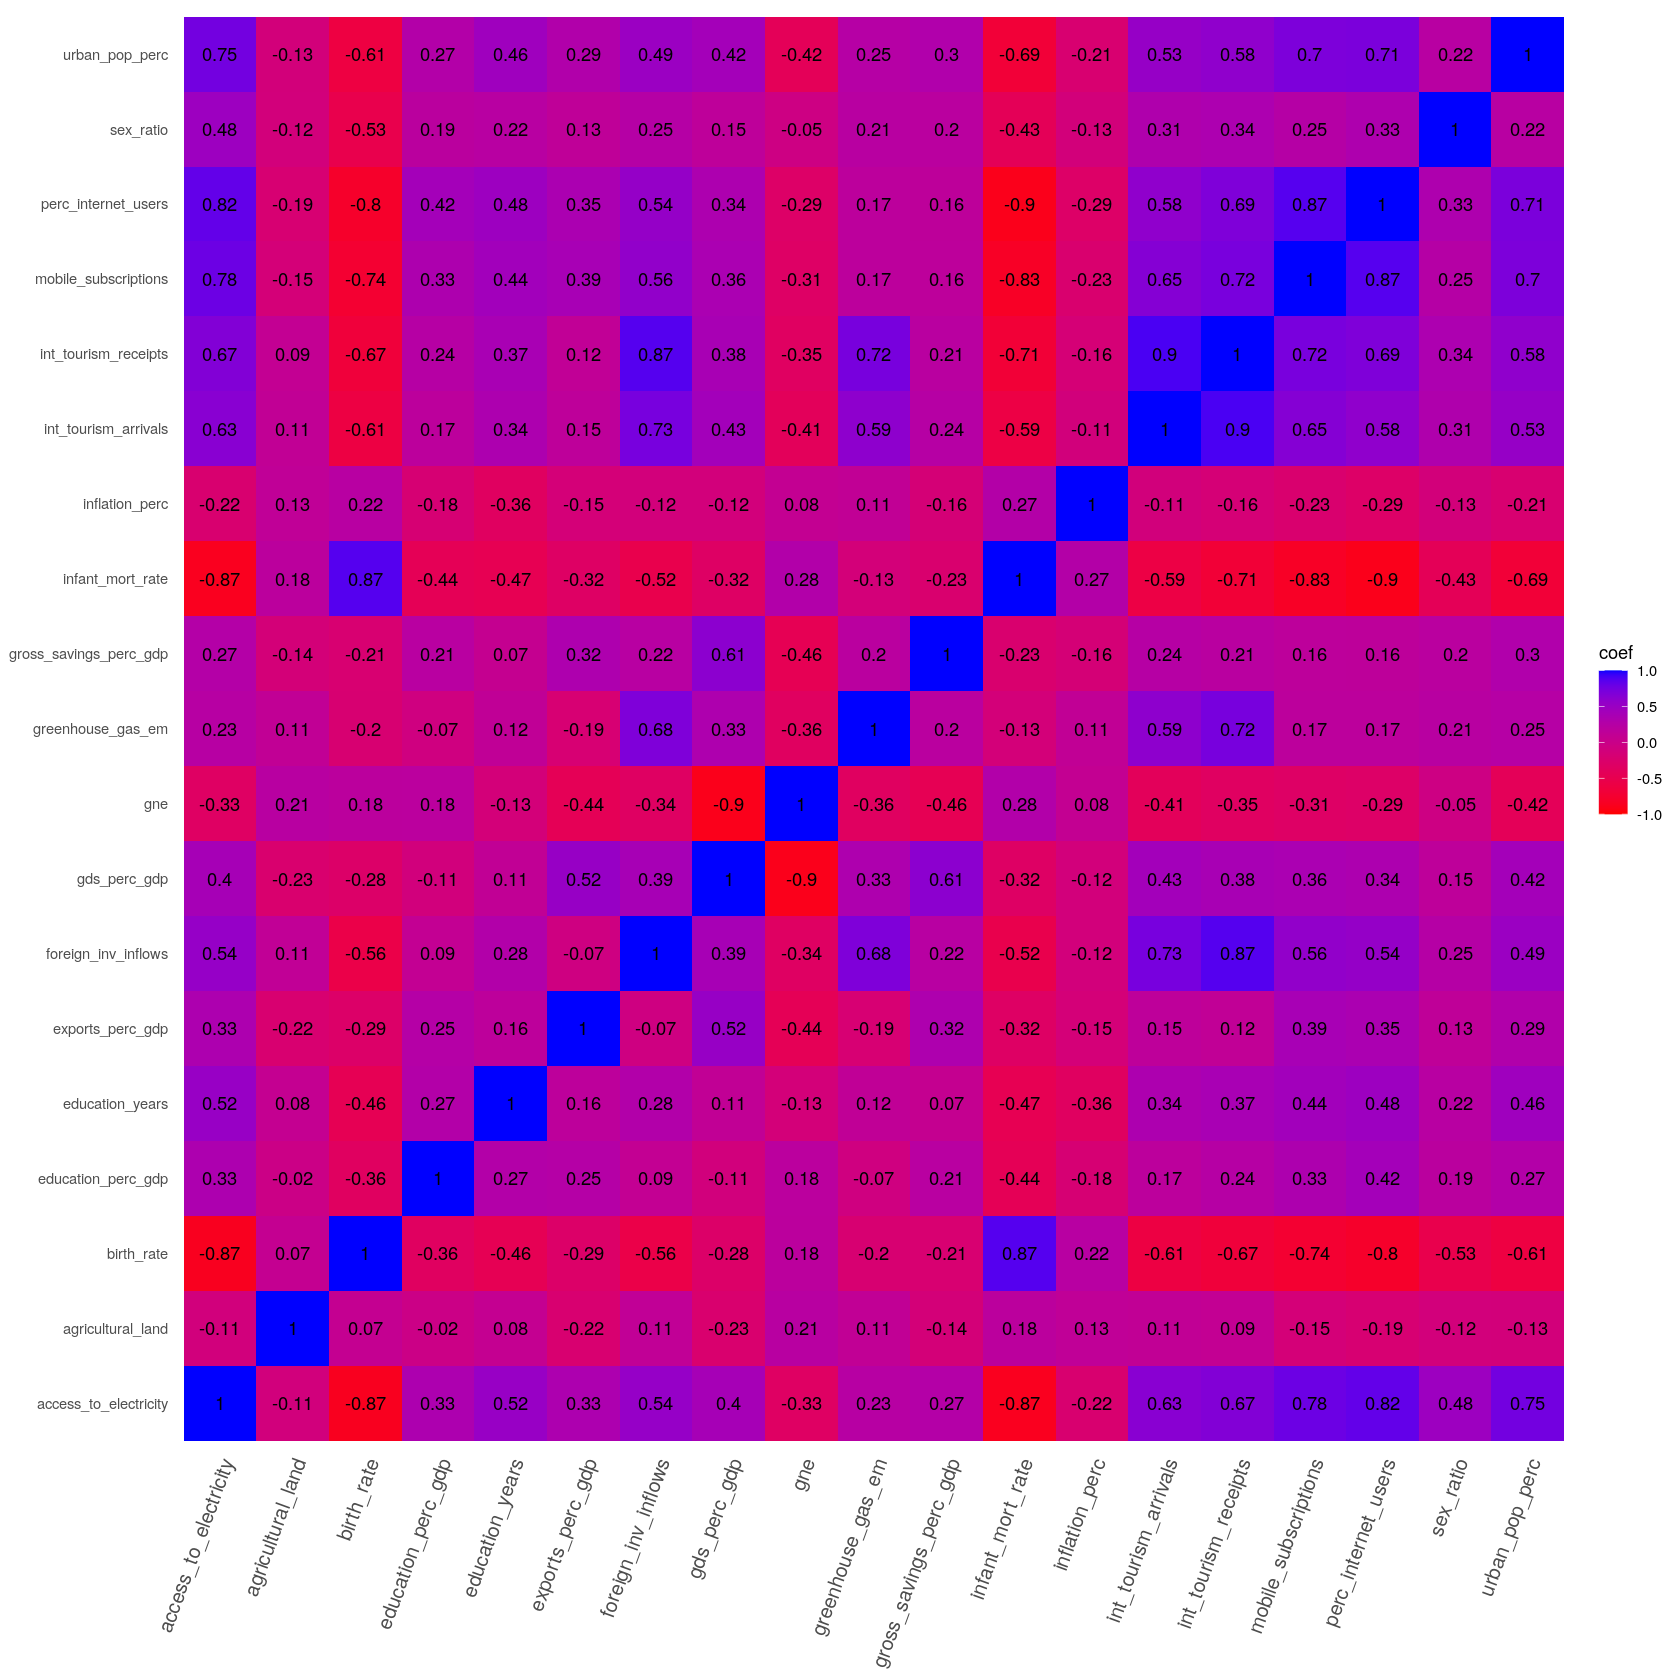

In [215]:
corr_mat %>% ggplot(aes(var1, var2, fill=coef)) +
                 geom_tile() +
                 geom_text(aes(label=round(coef,2))) +
                 scale_fill_gradient(low="red", high="blue", limits=c(-1,1))+
                 theme( axis.text.x = element_text(angle = 70, vjust = 1, size = 12, hjust = 1),
                        axis.title.x = element_blank(),
                        axis.title.y = element_blank(),
                        panel.grid.major = element_blank(),
                        panel.border = element_blank(),
                        panel.background = element_blank(),
                        axis.ticks = element_blank()) 